In [1]:
%matplotlib inline
import pymc3 as pm
import numpy as np
import pandas as pd
from scipy import stats
from scipy.interpolate import griddata
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'retina'
plt.style.use('seaborn-darkgrid')

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


#### Code 4.1

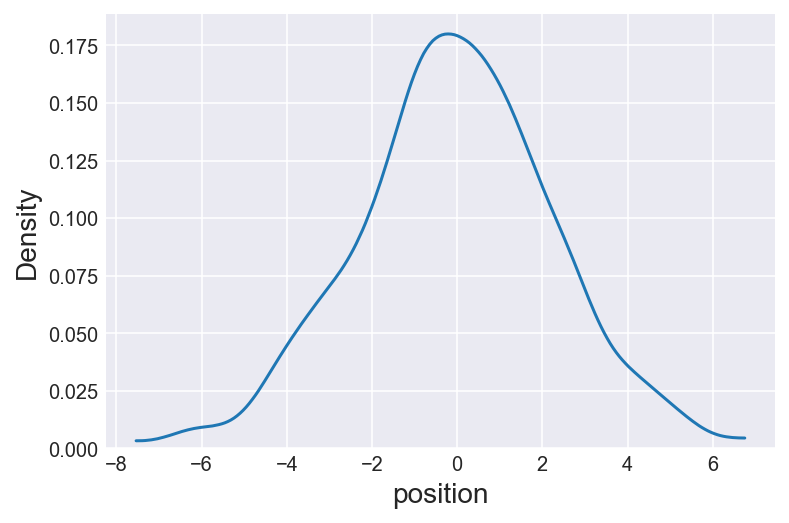

In [2]:
pos = np.random.uniform(-1, 1, size=(16, 1000)).sum(0)
pm.kdeplot(pos)
plt.xlabel('position', fontsize=14)
plt.ylabel('Density', fontsize=14);

#### Code 4.2 and 4.3

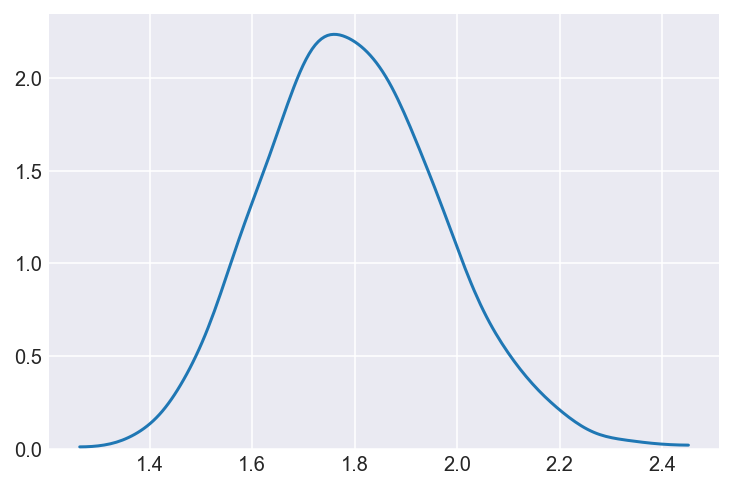

In [3]:
pos = np.random.uniform(1, 1.1, size=(12, 10000)).prod(0)
pm.kdeplot(pos);

#### Code 4.4

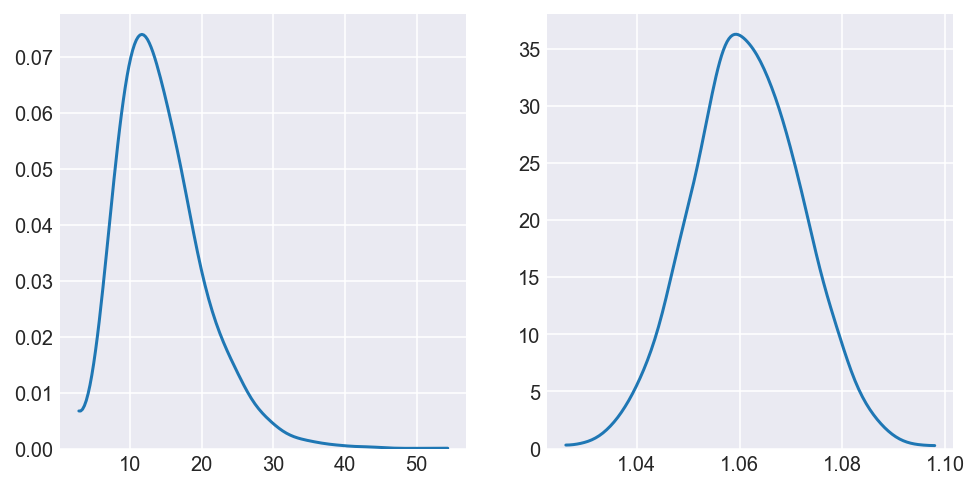

In [4]:
big = np.random.uniform(1, 1.5, size=(12, 10000)).prod(0)
small = np.random.uniform(1, 1.01, size=(12, 10000)).prod(0)
_, ax = plt.subplots(1,2, figsize=(8,4))
pm.kdeplot(big, ax=ax[0])
pm.kdeplot(small, ax=ax[1]);

#### Code 4.5

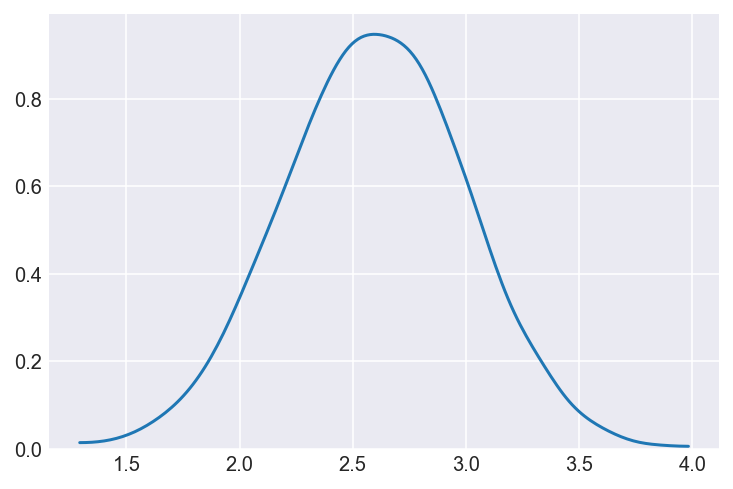

In [5]:
log_big = np.log(np.random.uniform(1, 1.5, size=(12, 10000)).prod(0))
pm.kdeplot(log_big);

#### Code 4.6

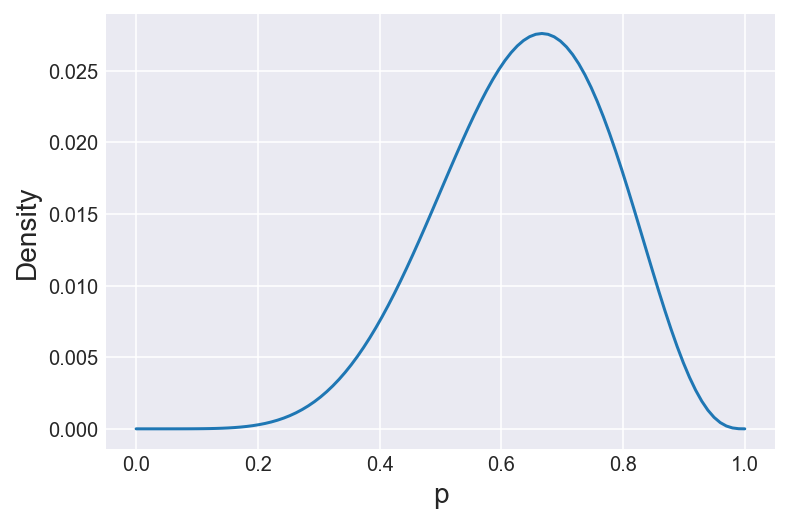

In [6]:
w, n = 6, 9
p_grid = np.linspace(0, 1, 100)
posterior = stats.binom.pmf(k=w, n=n, p=p_grid) * stats.uniform.pdf(p_grid, 0, 1)
posterior = posterior / (posterior).sum()
plt.plot(p_grid, posterior)
plt.xlabel('p', fontsize=14)
plt.ylabel('Density', fontsize=14);

#### Code 4.7 and 4.8

In [7]:
d = pd.read_csv('Data/Howell1.csv', sep=';', header=0)
d.head()

height     weight   age  male
0  151.765  47.825606  63.0     1
1  139.700  36.485807  63.0     0
2  136.525  31.864838  65.0     0
3  156.845  53.041915  41.0     1
4  145.415  41.276872  51.0     0

#### Code 4.9

In [8]:
d.height.head()

0    151.765
1    139.700
2    136.525
3    156.845
4    145.415
Name: height, dtype: float64

#### Code 4.10

In [9]:
d2 = d[d.age >= 18]

#### Code 4.11

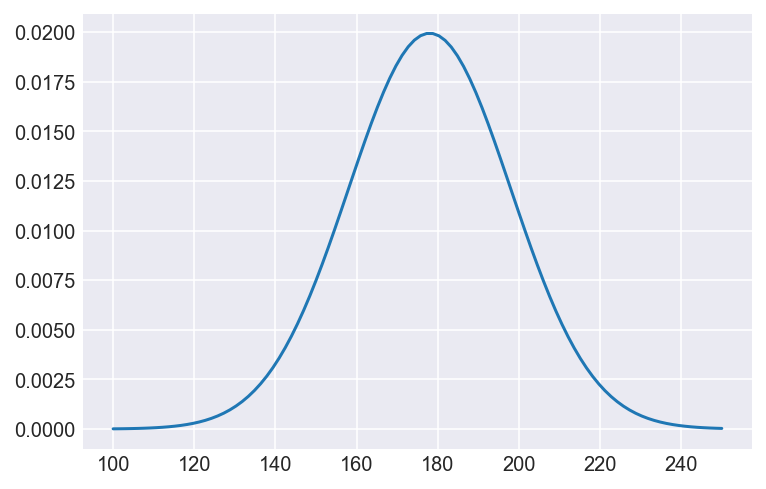

In [10]:
x = np.linspace(100, 250, 100)
plt.plot(x, stats.norm.pdf(x, 178, 20));

#### Code 4.12

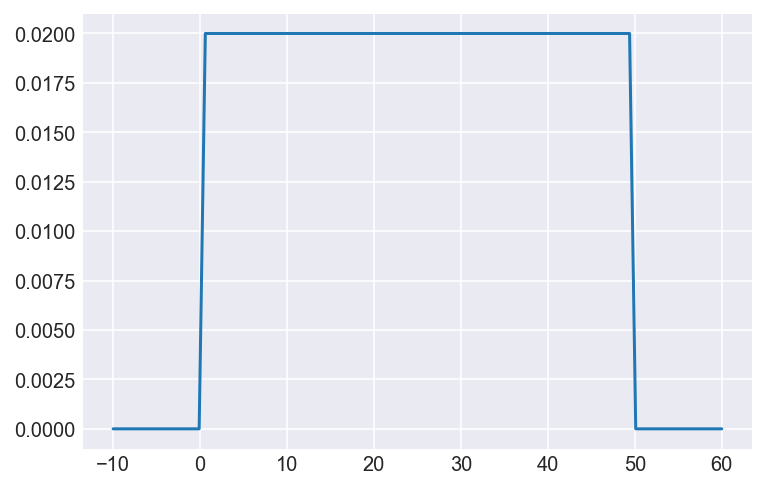

In [11]:
x = np.linspace(-10, 60, 100)
plt.plot(x, stats.uniform.pdf(x, 0, 50));

#### Code 4.13

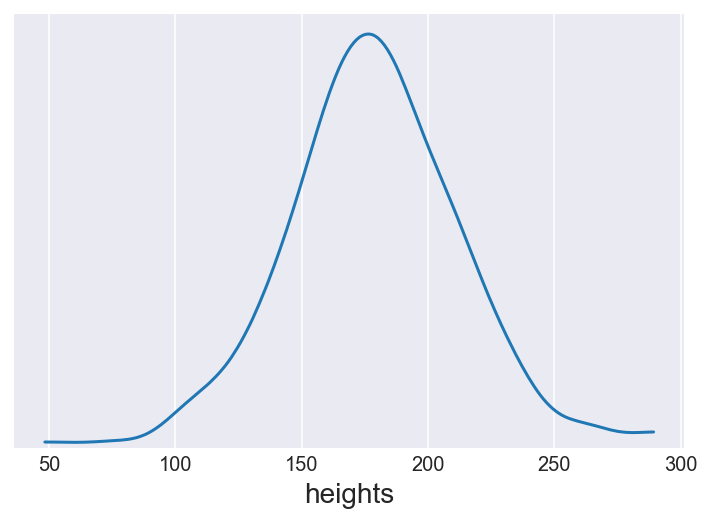

In [12]:
n_samples = 1000
sample_mu = stats.norm.rvs(loc=178, scale=20, size=n_samples)
sample_sigma = stats.uniform.rvs(loc=0, scale=50, size=n_samples)
prior_h = stats.norm.rvs(loc=sample_mu, scale=sample_sigma)
pm.kdeplot(prior_h)
plt.xlabel('heights', fontsize=14)
plt.yticks([]);

#### Code 4.14

In [13]:
post = np.mgrid[140:160:0.1, 4:9:0.1].reshape(2,-1).T

likelihood = [sum(stats.norm.logpdf(d2.height, loc=post[:,0][i], scale=post[:,1][i])) for i in range(len(post))]

post_prod = (likelihood + 
             stats.norm.logpdf(post[:,0], loc=178, scale=20) + 
             stats.uniform.logpdf(post[:,1], loc=0, scale=50))
post_prob = np.exp(post_prod - max(post_prod))

#### Code 4.15 and 4.16

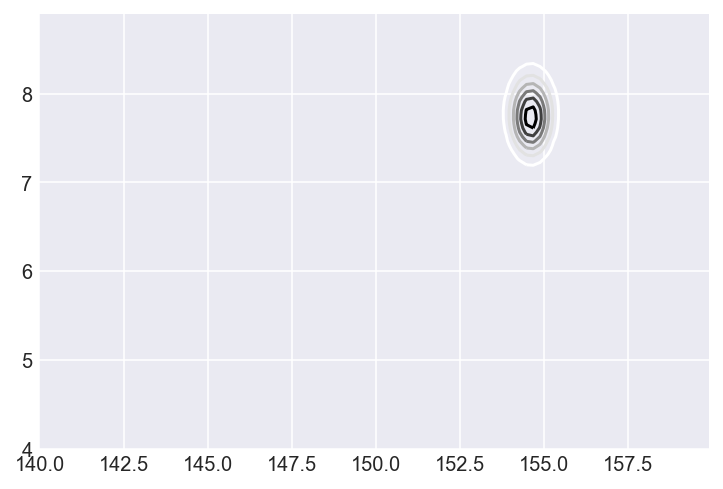

In [14]:
xi = np.linspace(post[:,0].min(), post[:,0].max(), 100)
yi = np.linspace(post[:,1].min(), post[:,1].max(), 100)
zi = griddata((post[:,0], post[:,1]), post_prob, (xi[None,:], yi[:,None]))

plt.contour(xi, yi, zi);

#### Code 4.17 and 4.18

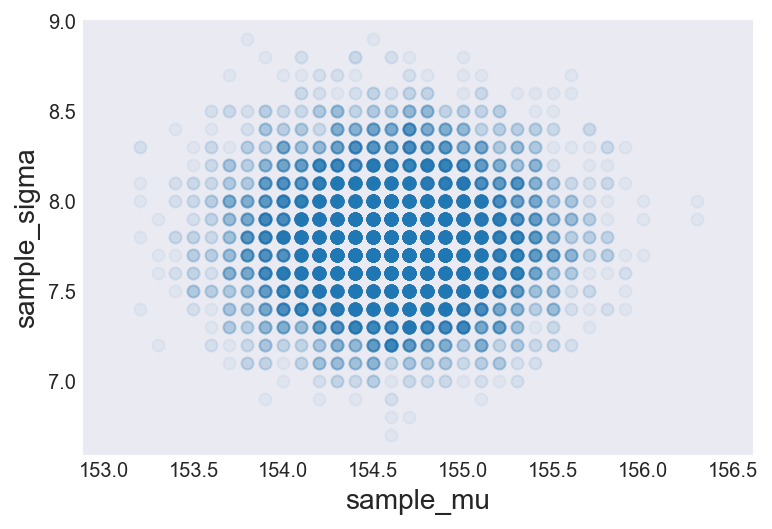

In [15]:
sample_rows = np.random.choice(np.arange(len(post)), size=10000, replace=True, 
                               p=(post_prob/post_prob.sum()))
sample_mu = post[:,0][sample_rows]
sample_sigma = post[:,1][sample_rows]

plt.plot(sample_mu, sample_sigma, 'o', alpha=0.05)
plt.axis('equal')
plt.grid(False)
plt.xlabel('sample_mu', fontsize=14)
plt.ylabel('sample_sigma', fontsize=14);

#### Code 4.19

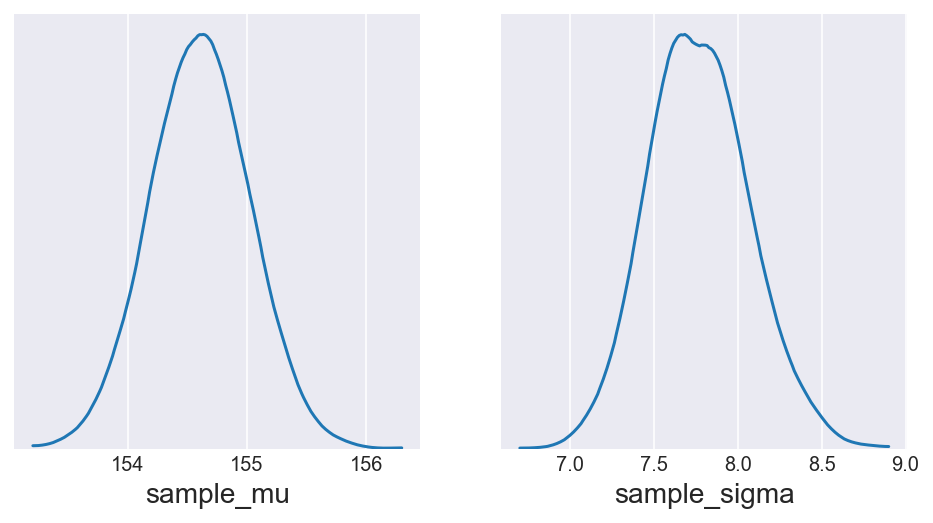

In [16]:
_, ax = plt.subplots(1,2, figsize=(8,4))
pm.kdeplot(sample_mu, ax=ax[0])
ax[0].set_xlabel('sample_mu', fontsize=14)
ax[0].set_yticks([])
pm.kdeplot(sample_sigma, ax=ax[1])
ax[1].set_xlabel('sample_sigma', fontsize=14)
ax[1].set_yticks([]);

#### Code 4.20

In [17]:
pm.hpd(sample_mu), pm.hpd(sample_sigma)

(array([153.8, 155.4]), array([7.3, 8.4]))

#### Code 4.21 and  4.22

In [18]:
d3 = np.random.choice(d2.height, 20)
post2 = np.mgrid[150:170:0.1, 4:20:0.1].reshape(2,-1).T

likelihood2 = [sum(stats.norm.logpdf(d3, loc=post[:,0][i], scale=post[:,1][i])) for i in range(len(post))]

post_prod2 = (likelihood + 
              stats.norm.logpdf(post[:,0], loc=178, scale=20) + 
              stats.uniform.logpdf(post[:,1], loc=0, scale=50))

post_prob2 = np.exp(post_prod - max(post_prod))

sample_rows2 = np.random.choice(np.arange(len(post)), size=10000, replace=True, 
                               p=(post_prob/post_prob.sum()))
sample_mu2 = post[:,0][sample_rows]
sample_sigma2 = post[:,1][sample_rows]

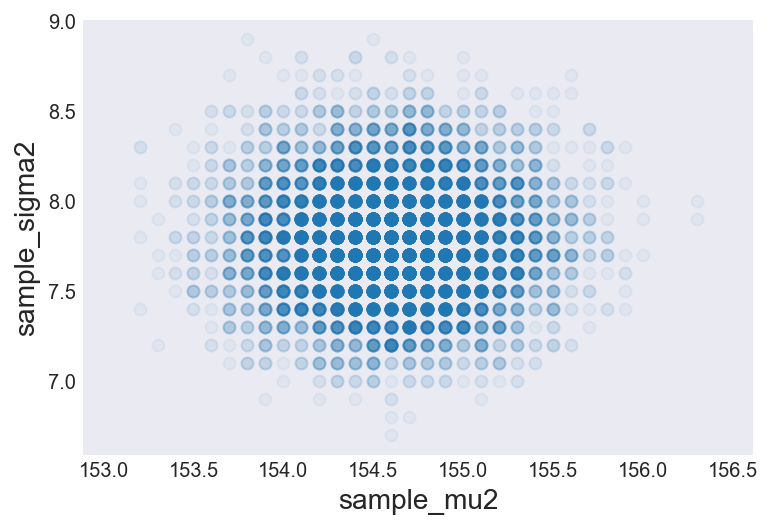

In [19]:
plt.plot(sample_mu2, sample_sigma2, 'o', alpha=0.05)
plt.axis('equal')
plt.xlabel('sample_mu2', fontsize=14)
plt.ylabel('sample_sigma2', fontsize=14)
plt.grid(False)

#### Code 4.23

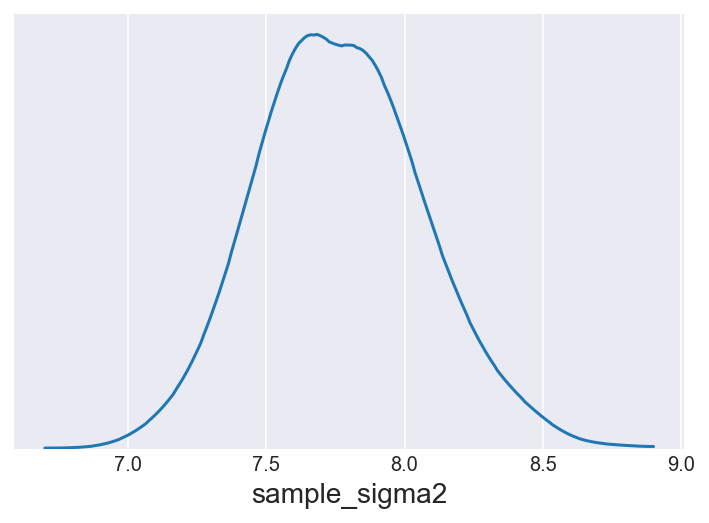

In [20]:
pm.kdeplot(sample_sigma2)
plt.xlabel('sample_sigma2', fontsize=14)
plt.yticks([]);

#### Code 4.24

We are repeating code 4.7, 4.8 and 4.10

In [21]:
d = pd.read_csv('Data/Howell1.csv', sep=';', header=0)
d2 = d[d.age >= 18]

#### Code 4.25

In [22]:
with pm.Model() as m4_1:
    mu = pm.Normal('mu', mu=178, sd=20)
    sigma = pm.Uniform('sigma', lower=0, upper=50)
    height = pm.Normal('height', mu=mu, sd=sigma, observed=d2.height)

#### Code 4.26

We could use a quadratic approximation like McElreath does in his book and we did in code 2.6. But Using PyMC3 is really simple to just sample from the model using a "sampler method". Most common sampler methods are members of the Markov Chain Monte Carlo Method (MCMC) family (for details read Section 2.4.3 and Chapter 8 of Statistical Rethinking).

PyMC3 comes with various samplers. Some samplers are more suited than others for certain type of variable (and/or problems). For now we are going to let PyMC3 choose the sampler for us. PyMC3 also tries to provide a reasonable starting point for the simulation. By default PyMC3 uses the same adaptive procedure as in STAN `'jitter+adapt_diag'`, which start with a identity mass matrix and then adapt a diagonal based on the variance of the tuning samples. 

You can read more details of PyMC3 [here](http://pymc-devs.github.io/pymc3/notebooks/getting_started.html)

In [23]:
with m4_1:
    trace_4_1 = pm.sample(1000, tune=1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sigma, mu]
Sampling 2 chains: 100%|██████████| 4000/4000 [00:02<00:00, 1418.41draws/s]


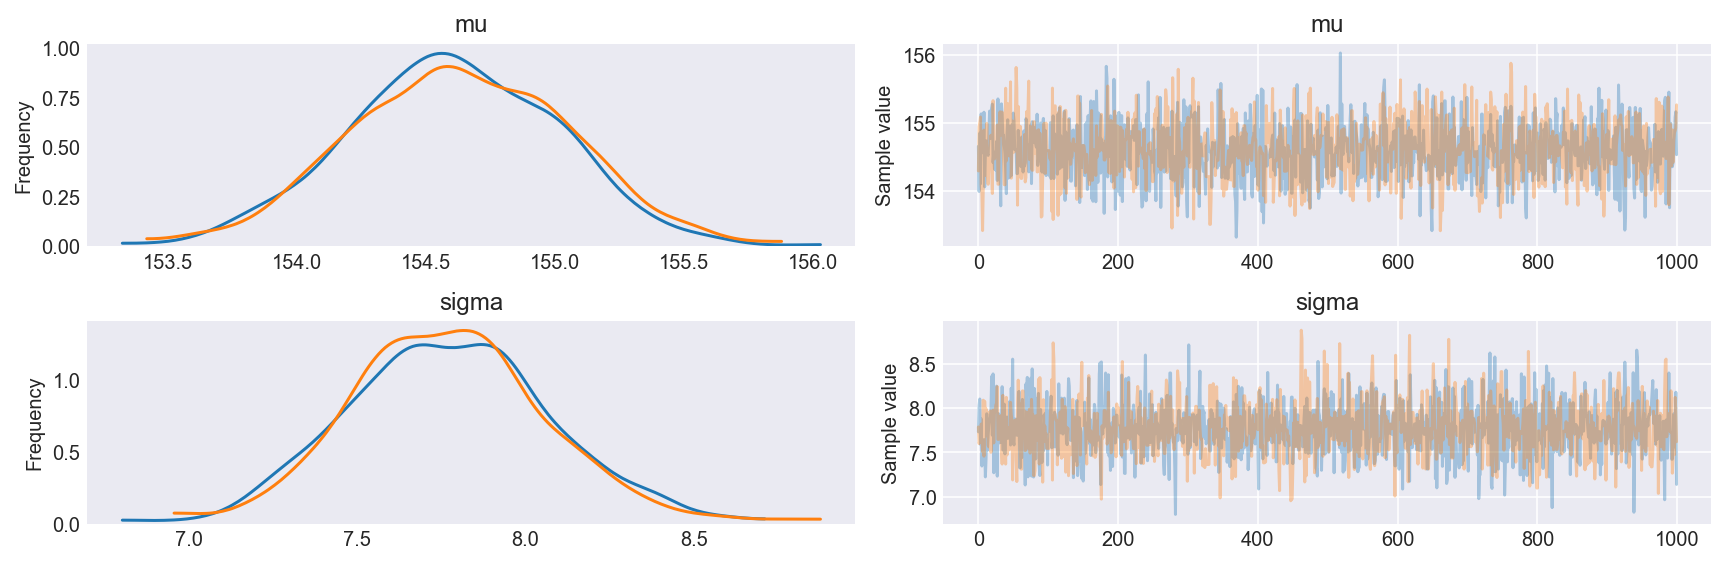

In [24]:
pm.traceplot(trace_4_1); # this function let you check the samples values

#### Code 4.27

Notice that compared to the table in the book we have an extra column, "mc_error". Since we are sampling from the posterior, there is an error introducing by the sampling process. This error can be reduced by taking more samples.

In [25]:
pm.summary(trace_4_1, alpha=.11).round(2)

mean    sd  mc_error  hpd_5.5  hpd_94.5    n_eff  Rhat
mu     154.61  0.41      0.01   153.99    155.29  1762.43   1.0
sigma    7.77  0.30      0.01     7.30      8.23  1931.11   1.0

#### Code 4.28

In [26]:
with pm.Model() as m4_1:
    mu = pm.Normal('mu', mu=178, sd=20, testval=d2.height.mean())
    sigma = pm.Uniform('sigma', lower=0, upper=50, testval=d2.height.std())
    height = pm.Normal('height', mu=mu, sd=sigma, observed=d2.height)
    trace_4_1 = pm.sample(1000, tune=1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sigma, mu]
Sampling 2 chains: 100%|██████████| 4000/4000 [00:04<00:00, 855.97draws/s] 


mean    sd  mc_error  hpd_5.5  hpd_94.5    n_eff  Rhat
mu     154.60  0.39      0.01   153.95    155.20  2095.75   1.0
sigma    7.76  0.30      0.01     7.30      8.25  1941.15   1.0

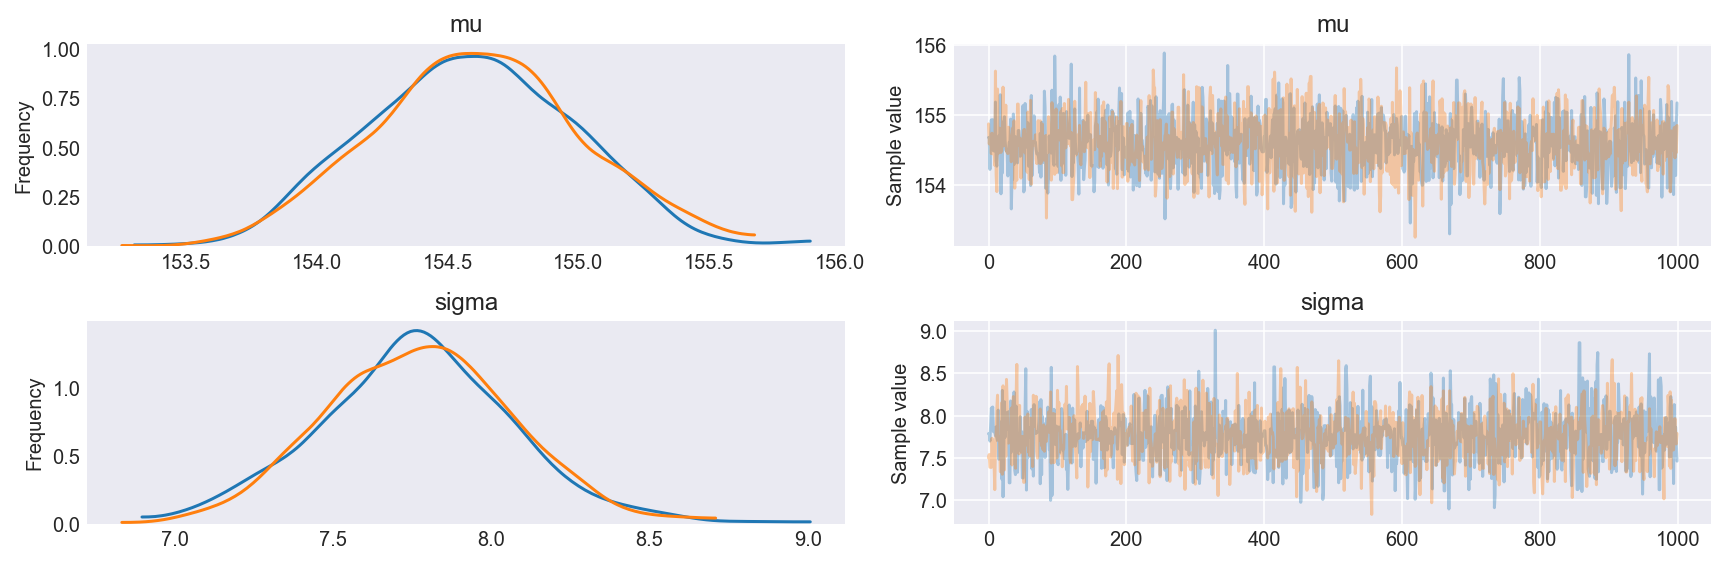

In [27]:
pm.traceplot(trace_4_1); 
pm.summary(trace_4_1, alpha=.11).round(2)

#### Code 4.29

In [28]:
with pm.Model() as m4_2:
    mu = pm.Normal('mu', mu=178, sd=0.1)
    sigma = pm.Uniform('sigma', lower=0, upper=50)
    height = pm.Normal('height', mu=mu, sd=sigma, observed=d2.height)
    trace_4_2 = pm.sample(1000, tune=1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sigma, mu]
Sampling 2 chains: 100%|██████████| 4000/4000 [00:08<00:00, 472.22draws/s]


In [29]:
pm.summary(trace_4_2, alpha=.11).round(2)

mean    sd  mc_error  hpd_5.5  hpd_94.5    n_eff  Rhat
mu     177.86  0.10      0.00   177.69    178.02  1778.77   1.0
sigma   24.63  0.94      0.02    23.18     26.13  2027.71   1.0

#### Code 4.30

For some computations could be nice to have the trace turned into a DataFrame, this can be done using the `trace_to_dataframe` function

In [30]:
trace_df = pm.trace_to_dataframe(trace_4_1)
trace_df.cov()

mu     sigma
mu     0.153857  0.003729
sigma  0.003729  0.090325

#### Code 4.31

In [31]:
np.diag(trace_df.cov())

array([0.153857  , 0.09032475])

In [32]:
trace_df.corr()

mu     sigma
mu     1.000000  0.031635
sigma  0.031635  1.000000

#### Code 4.32

We did not use the quadratic approximation, instead we use a MCMC method to sample from the posterior. Thus, we already have samples. We can do something like

In [33]:
trace_df.head()

mu     sigma
0  154.680378  7.786637
1  154.680378  7.786637
2  154.224299  7.698251
3  154.723084  7.884663
4  154.930765  8.089059

Or directly from the trace (we are getting the first ten samples of _sigma_)

In [34]:
trace_4_1['sigma'][:10]

array([7.78663732, 7.78663732, 7.69825145, 7.88466282, 8.08905875,
       8.02859759, 8.10091438, 7.80999123, 7.80999123, 7.80999123])

#### Code 4.33

In our case, this is the same we did in the code 4.27

In [35]:
pm.summary(trace_4_1, alpha=.11).round(2)

mean    sd  mc_error  hpd_5.5  hpd_94.5    n_eff  Rhat
mu     154.60  0.39      0.01   153.95    155.20  2095.75   1.0
sigma    7.76  0.30      0.01     7.30      8.25  1941.15   1.0

#### Code 4.34

In [36]:
stats.multivariate_normal.rvs(mean=trace_df.mean(), cov=trace_df.cov(), size=10)

array([[154.29314723,   7.8638959 ],
       [153.79063938,   7.99025754],
       [154.45103371,   7.46813794],
       [154.18231225,   7.66413124],
       [153.928451  ,   8.04891559],
       [154.68378694,   7.15833065],
       [154.60493971,   8.12469959],
       [155.05050383,   7.80364458],
       [154.08131649,   7.84724335],
       [154.25578869,   7.60398312]])

#### Code 4.35 and 4.36

Instead of sampling from a normal and then exponentiating to ensure sigma is positive, we can use the lognormal distribution for the same result. The Lognormal distribution is parametrized in terms of $\tau$ (tau) the precision and not the standard deviation, where: 

$$tau=\frac{1}{\sigma^2}$$

The normal distribution can also be parametrized in terms of the precision (tau). Given that the conversion between both parametrization is done right, which one to use is only a matter of convenience. 

In [37]:
with pm.Model() as m4_1_logsigma:
    mu = pm.Normal('mu', mu=178, sd=20)
    sigma = pm.Lognormal('sigma', mu=2, tau=0.01)
    height = pm.Normal('height', mu=mu, sd=sigma, observed=d2.height)
    trace_4_1_logsigma = pm.sample(1000, tune=1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sigma, mu]
Sampling 2 chains: 100%|██████████| 4000/4000 [00:03<00:00, 1180.41draws/s]


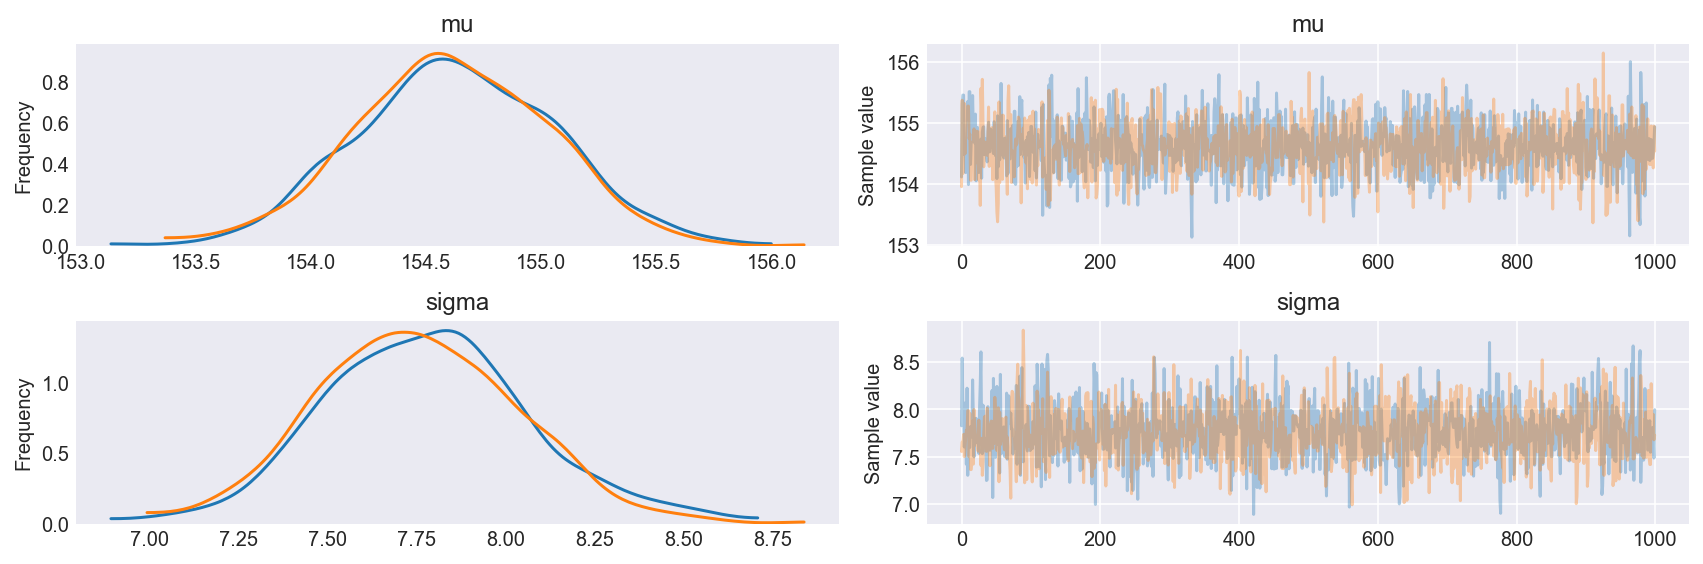

In [38]:
pm.traceplot(trace_4_1_logsigma);

#### Code 4.37

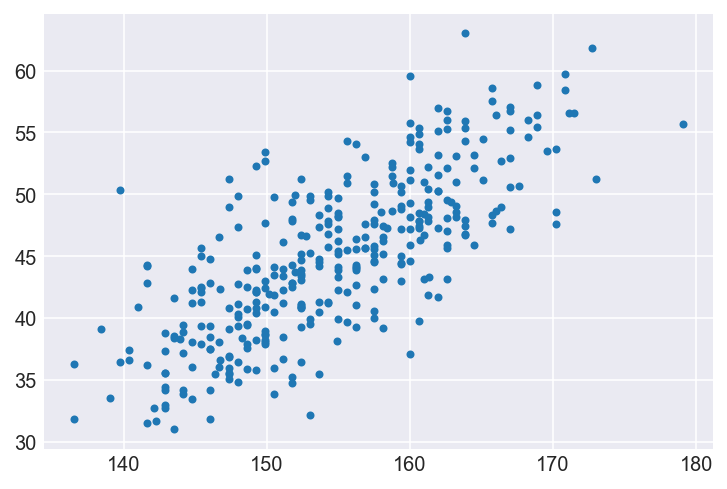

In [39]:
plt.plot(d2.height, d2.weight, '.');

#### Code 4.38 and 4.39

Notice that the variable mu is defined as alpha + beta * d2.weight in a single line. If we want the trace to contain mu we can write as a deterministic varible. The computating will be exactly the same. The only difference is that mu will be accessible in the trace.

In [40]:
with pm.Model() as m4_3:
    alpha = pm.Normal('alpha', mu=178, sd=100)
    beta = pm.Normal('beta', mu=0, sd=10)
    sigma = pm.Uniform('sigma', lower=0, upper=50)
    mu = alpha + beta * d2.weight
    #mu = pm.Deterministic('mu', alpha + beta * d2.weight) # try uncomenting this line and comenting the above line
    height = pm.Normal('height', mu=mu, sd=sigma, observed=d2.height)
    trace_4_3 = pm.sample(1000, tune=1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sigma, beta, alpha]
Sampling 2 chains: 100%|██████████| 4000/4000 [00:21<00:00, 186.95draws/s]


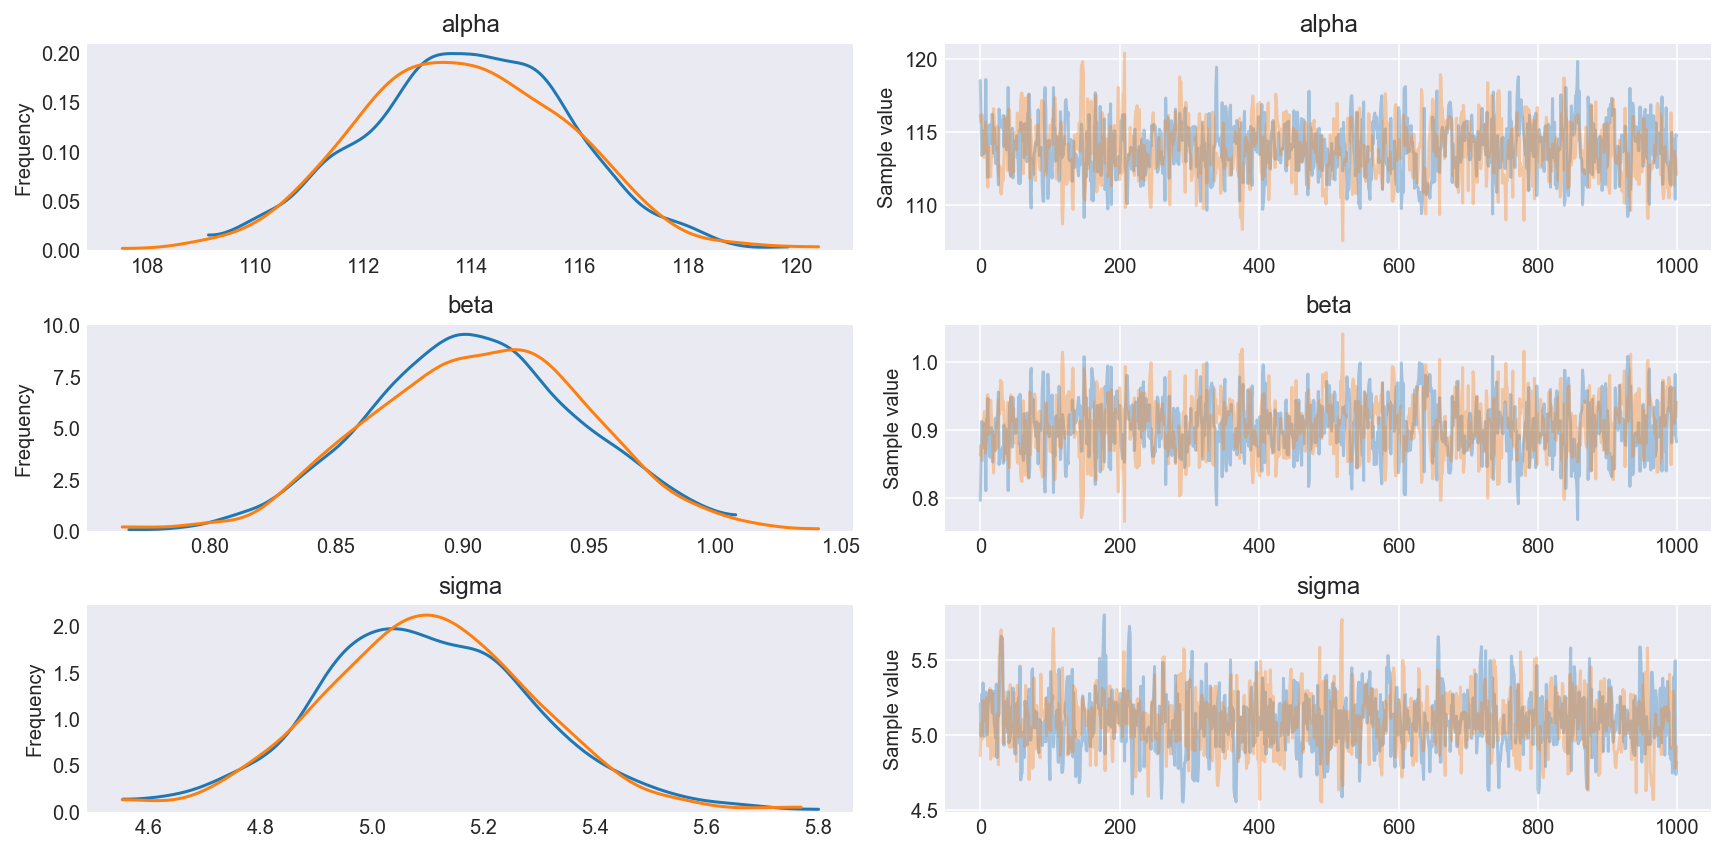

In [41]:
pm.traceplot(trace_4_3);

Another alternative is to write mu inside the likelihood and not as a separate line.

    height = pm.Normal('height', mu=alpha + beta * d2.weight, sd=sigma, observed=d2.height)
    
Using PyMC3 there is not too much reason to do this. I personally think that defining mu in a separate line improves readability.

#### Code 4.40

In [42]:
pm.summary(trace_4_3, alpha=.11).round(2)

mean    sd  mc_error  hpd_5.5  hpd_94.5    n_eff  Rhat
alpha  113.85  1.89      0.07   110.85    116.76   783.16   1.0
beta     0.91  0.04      0.00     0.84      0.97   776.13   1.0
sigma    5.10  0.19      0.01     4.77      5.39  1016.84   1.0

#### Code 4.41

In [43]:
trace_df = pm.trace_to_dataframe(trace_4_3)
trace_df.corr().round(2)

alpha  beta  sigma
alpha   1.00 -0.99  -0.01
beta   -0.99  1.00   0.01
sigma  -0.01  0.01   1.00

#### Code 4.42

In [44]:
d2 = d2.assign(weight_c=pd.Series(d2.weight - d2.weight.mean()))

#### Code 4.43

In [45]:
with pm.Model() as m4_4:
    alpha = pm.Normal('alpha', mu=178, sd=100)
    beta = pm.Normal('beta', mu=0, sd=10)
    sigma = pm.Uniform('sigma', lower=0, upper=50)
    mu = alpha + beta * d2.weight_c
    height = pm.Normal('height', mu=mu, sd=sigma, observed=d2.height)
    trace_4_4 = pm.sample(1000, tune=1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sigma, beta, alpha]
Sampling 2 chains: 100%|██████████| 4000/4000 [00:04<00:00, 910.33draws/s] 


#### Code 4.44

In [46]:
pm.summary(trace_4_4, alpha=.11).round(2)

mean    sd  mc_error  hpd_5.5  hpd_94.5    n_eff  Rhat
alpha  154.61  0.28      0.01   154.17    155.05  2694.14   1.0
beta     0.91  0.04      0.00     0.83      0.97  3243.95   1.0
sigma    5.11  0.20      0.00     4.77      5.40  2595.39   1.0

#### Code 4.45

Instead of using the MAP, we are going to use the mean of the posterior 

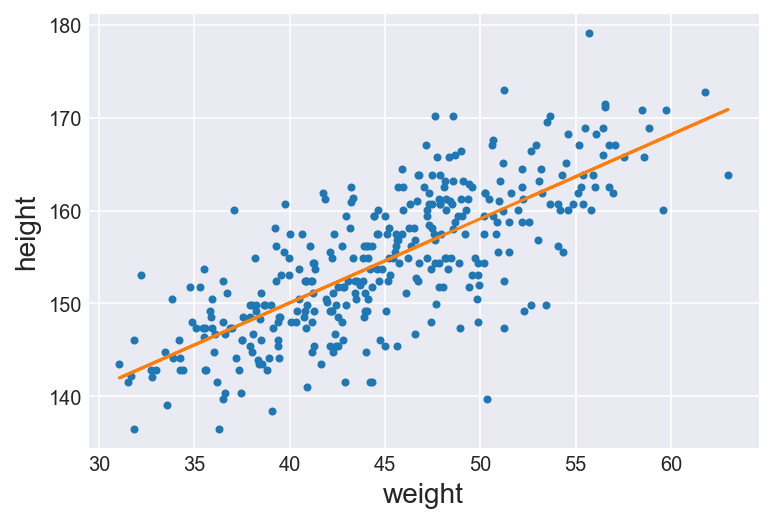

In [47]:
plt.plot(d2.weight, d2.height, '.')
plt.plot(d2.weight, trace_4_3['alpha'].mean() + trace_4_3['beta'].mean() * d2.weight)
plt.xlabel(d2.columns[1], fontsize=14)
plt.ylabel(d2.columns[0], fontsize=14);

#### Code 4.46 and 4.47

In [48]:
pm.trace_to_dataframe(trace_4_4)[:5]

alpha      beta     sigma
0  154.809366  0.858763  5.303773
1  154.273062  0.933018  5.090729
2  154.722050  0.872200  5.093030
3  154.512622  0.898682  4.891320
4  154.673859  0.843321  5.051422

#### Code 4.48

In [49]:
N = [10, 50, 150, 352][0]
with pm.Model() as m_N:
    alpha = pm.Normal('alpha', mu=178, sd=100)
    beta = pm.Normal('beta', mu=0, sd=10)
    sigma = pm.Uniform('sigma', lower=0, upper=50)
    mu = pm.Deterministic('mu', alpha + beta * d2.weight[:N])
    height_hat = pm.Normal('height_hat', mu=mu, sd=sigma, observed=d2.height[:N])
    trace_N = pm.sample(1000, tune=1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sigma, beta, alpha]
Sampling 2 chains: 100%|██████████| 4000/4000 [00:07<00:00, 553.52draws/s]
There were 7 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.7055985326568991, but should be close to 0.8. Try to increase the number of tuning steps.
There were 2 divergences after tuning. Increase `target_accept` or reparameterize.


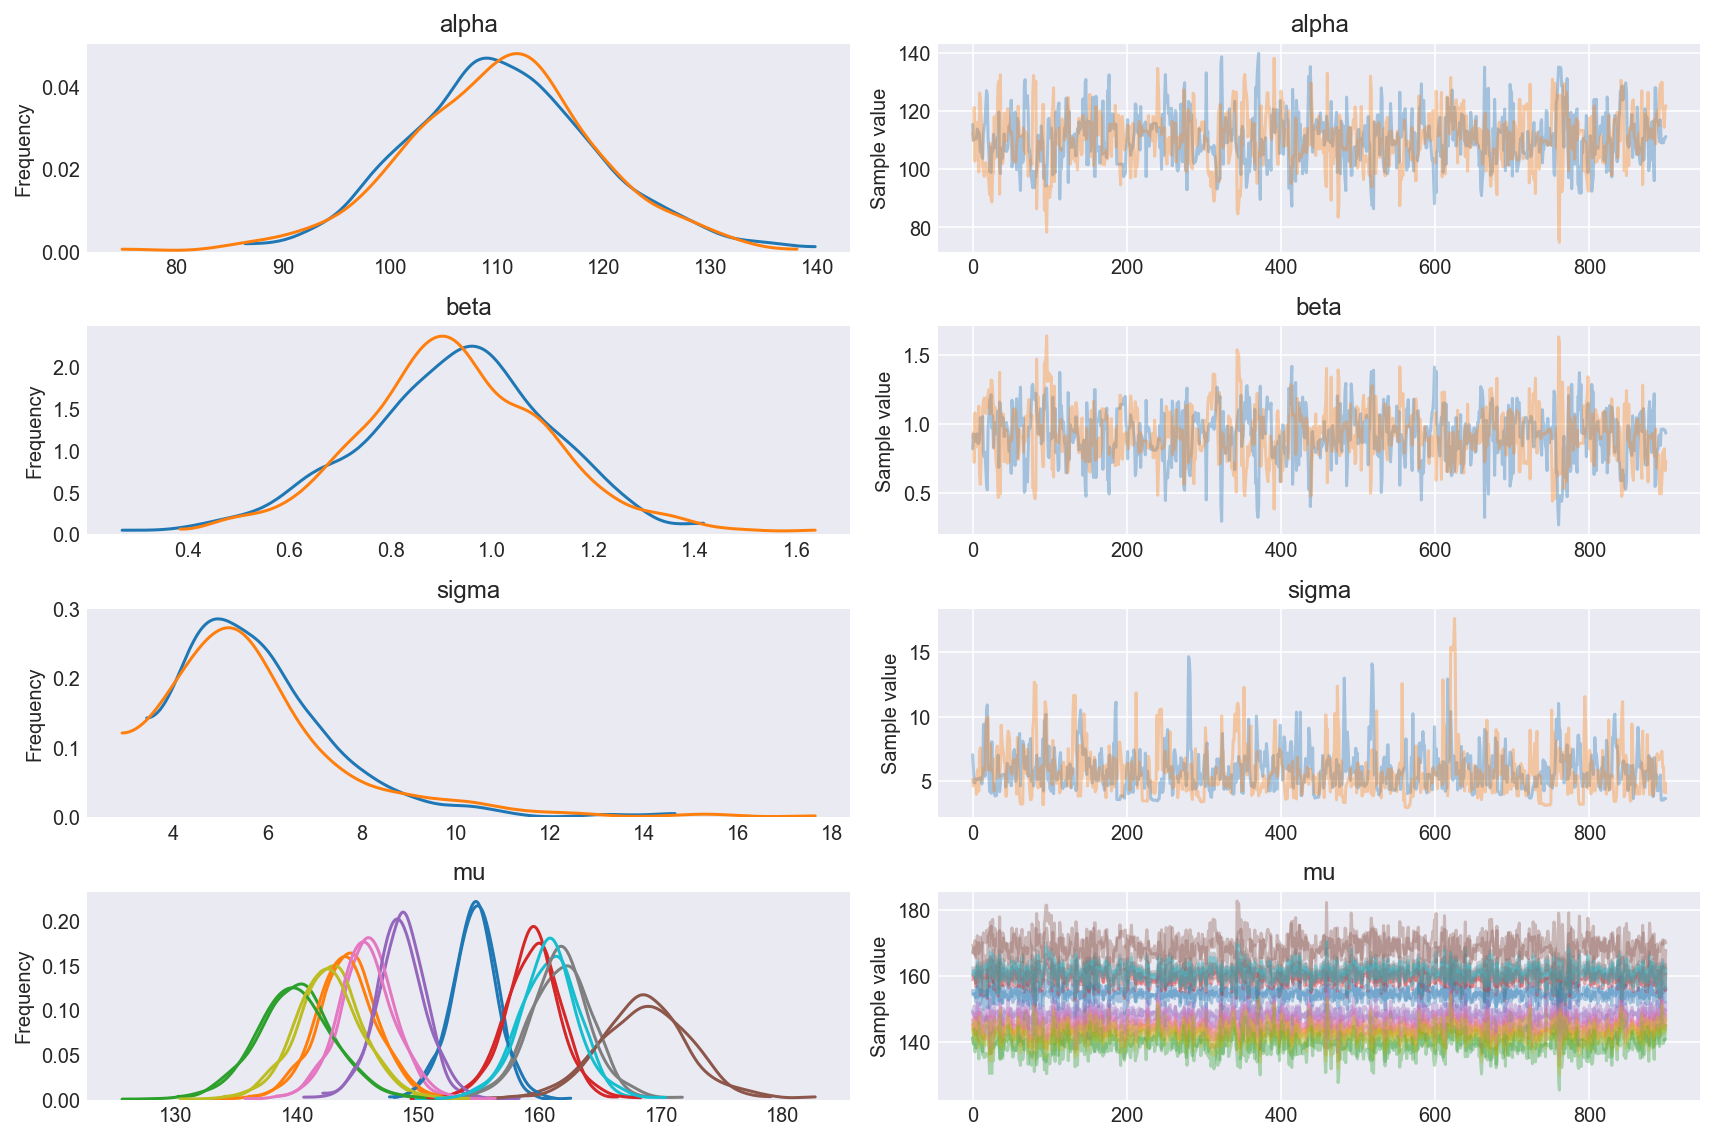

In [50]:
chain_N = trace_N[100:]
pm.traceplot(chain_N);

#### Code 4.49

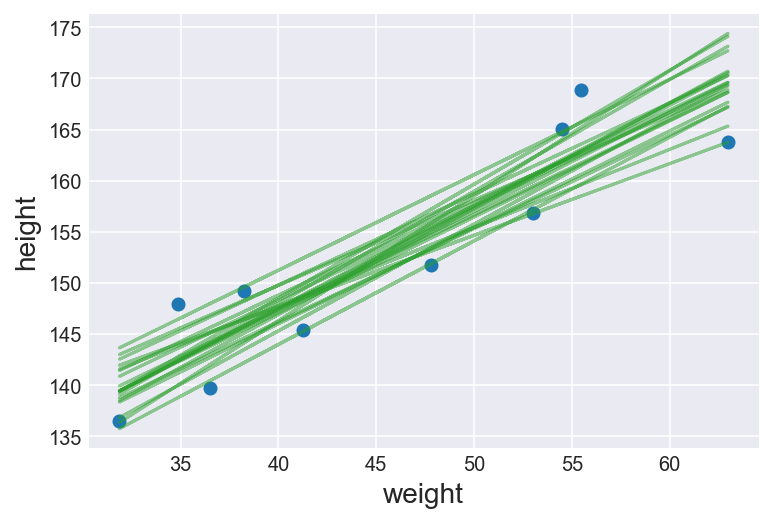

In [51]:
plt.plot(d2.weight[:N], d2.height[:N], 'C0o')
for _ in range(0, 20):
    idx = np.random.randint(len(chain_N))
    plt.plot(d2.weight[:N], chain_N['alpha'][idx] + chain_N['beta'][idx] * d2.weight[:N], 'C2-', alpha=0.5)
plt.xlabel(d2.columns[1], fontsize=14)
plt.ylabel(d2.columns[0], fontsize=14);

Alternative we can directly use the deterministic mu variable

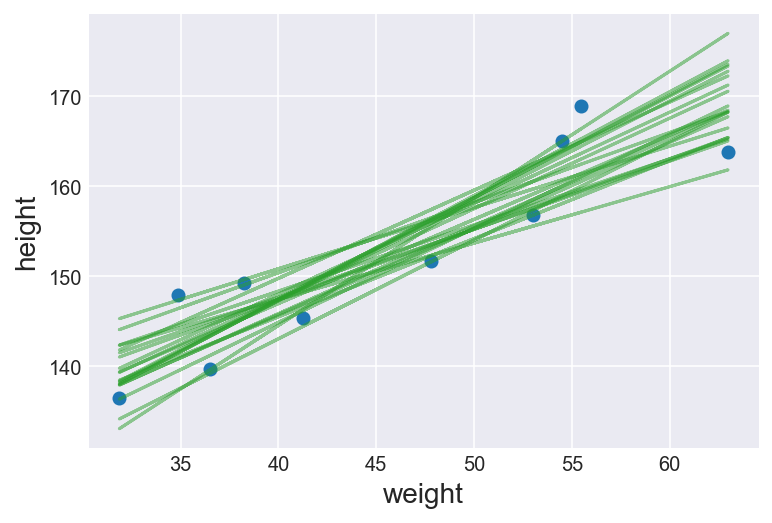

In [52]:
plt.plot(d2.weight[:N], d2.height[:N], 'C0o')
for _ in range(0, 20):
    idx = np.random.randint(len(chain_N))
    plt.plot(d2.weight[:N], chain_N['mu'][idx], 'C2-', alpha=0.5)
plt.xlabel(d2.columns[1], fontsize=14)
plt.ylabel(d2.columns[0], fontsize=14);

#### Code 4.50 and 4.51

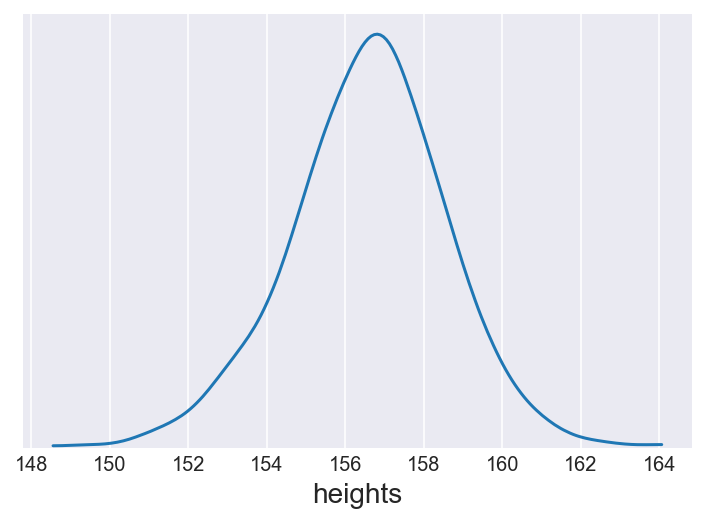

In [53]:
mu_at_50 = chain_N['alpha'] + chain_N['beta'] * 50
pm.kdeplot(mu_at_50)
plt.xlabel('heights', fontsize=14)
plt.yticks([]);

#### Code 4.52

In [54]:
pm.hpd(mu_at_50, alpha=.11)

array([153.18500031, 159.57907302])

#### Code 4.53

Using PyMC3, we do not need to compute anything else. By defining a deterministic variable mu in the model, we add that variable to the trace. Thus we get a matrix with row samples from the posterior and columns values of weights. We can access this matrix directly from the trace or turn it into a DataFrame, it all depends on what we need.

In [55]:
df_trace_N = pm.trace_to_dataframe(chain_N).filter(regex=('mu.*'))
df_trace_N.head()

mu__0       mu__1       mu__2       mu__3       mu__4       mu__5  \
0  154.618358  145.307345  141.513107  158.901424  149.241248  167.071838   
1  154.237459  143.725208  139.441465  159.073095  148.166634  168.297595   
2  154.710563  144.211675  139.933378  159.540051  148.647455  168.752825   
3  154.710563  144.211675  139.933378  159.540051  148.647455  168.752825   
4  152.241805  142.329808  138.290669  156.801323  146.517626  165.499101   

        mu__6       mu__7       mu__8       mu__9  
0  146.750552  160.903292  143.980526  160.088578  
1  145.354607  161.333229  142.227212  160.413407  
2  145.839003  161.797312  142.715584  160.878659  
3  145.839003  161.797312  142.715584  160.878659  
4  143.866167  158.932403  140.917348  158.065103

#### Code 4.54 and 4.58

We are doing _manually_, in the book is done using the ```link``` function. In the book on code 4.58 the following operations are performed _manually_.

In [187]:
weight_seq = np.arange(25, 71)
# Given that we have a lot of samples we can use less of them for plotting (or we can use all!)
chain_N_thinned = chain_N[::10]
mu_pred = np.zeros((len(weight_seq), len(chain_N_thinned)*chain_N.nchains))
for i, w in enumerate(weight_seq):
    mu_pred[i] = chain_N_thinned['alpha'] + chain_N_thinned['beta'] * w

#### Code 4.55

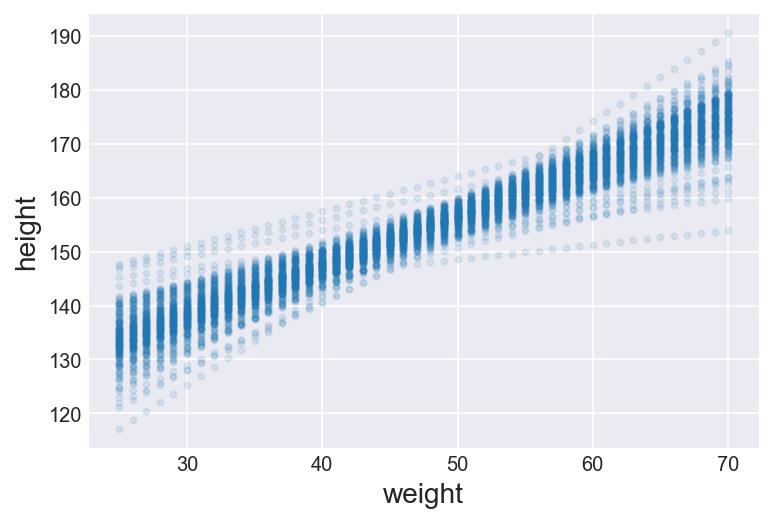

In [188]:
plt.plot(weight_seq, mu_pred, 'C0.', alpha=0.1)
plt.xlabel('weight', fontsize=14)
plt.ylabel('height', fontsize=14);

#### Code 4.56

In [189]:
# Summarize the distribution of mu
mu_mean = mu_pred.mean(1)
mu_hpd = pm.hpd(mu_pred.T, alpha=.11)

#### Code 4.57

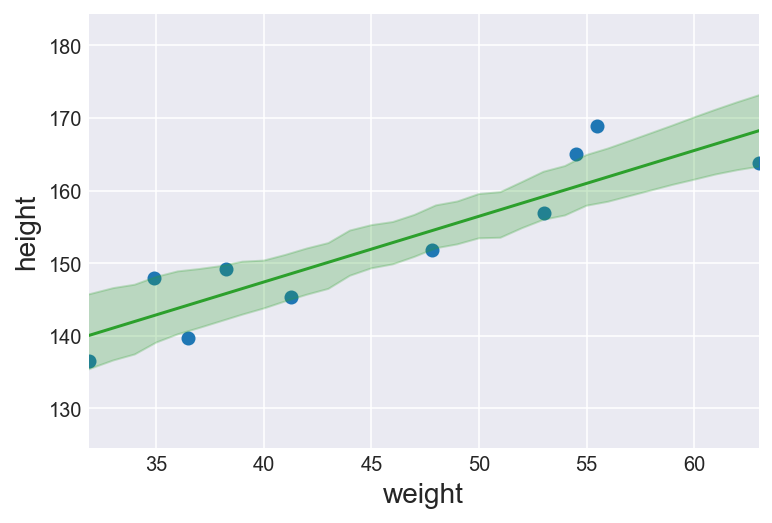

In [190]:
plt.scatter(d2.weight[:N], d2.height[:N])
plt.plot(weight_seq, mu_mean, 'C2')
plt.fill_between(weight_seq, mu_hpd[:,0], mu_hpd[:,1], color='C2', alpha=0.25)
plt.xlabel('weight', fontsize=14)
plt.ylabel('height', fontsize=14)
plt.xlim(d2.weight[:N].min(), d2.weight[:N].max());

#### Code 4.59

Now we are going to use ```sample_ppc()``` from PyCM3. This function give us posterior predictive samples, that is for each value of the input variable we get the a sample (from the posterior) of the output variable. Thus in the following example the shape of height_pred['height_hat'].shape is (200, 352)

In [208]:
height_pred = pm.sample_ppc(chain_N, 200, m_N)

100%|██████████| 200/200 [00:00<00:00, 1110.80it/s]


#### Code 4.60

In [209]:
height_pred_hpd = pm.hpd(height_pred['height_hat'])

#### Code 4.61
```sample_ppc``` returns values corresponding to the input values (weights in this example). Because the weights are not ordered if we use them with the ```fill_between``` function we will get a mess. For that reason in the following cell we order the weights and the predicted heights

In [193]:
idx = np.argsort(d2.weight.values[:N])
d2_weight_ord = d2.weight.values[:N][idx]
height_pred_hpd = height_pred_hpd[idx]

In [213]:
height_pred['height_hat'].shape

(200, 10)

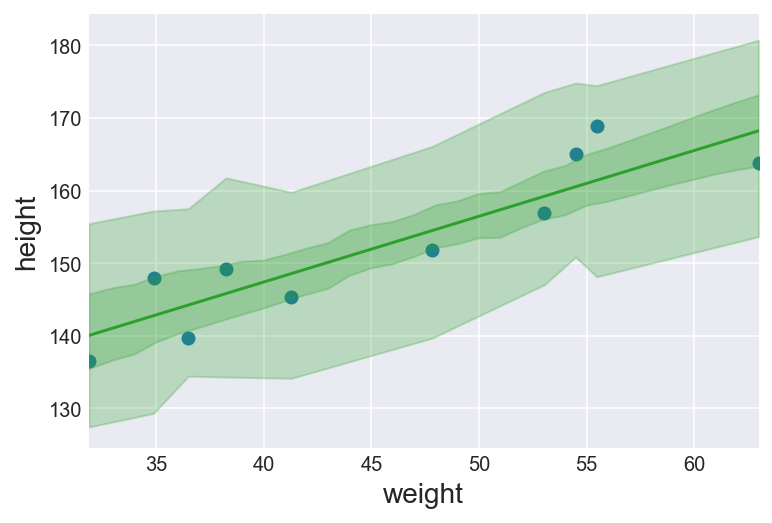

In [194]:
plt.scatter(d2.weight[:N], d2.height[:N])
plt.fill_between(weight_seq, mu_hpd[:,0], mu_hpd[:,1], color='C2', alpha=0.25)
plt.fill_between(d2_weight_ord, height_pred_hpd[:,0], height_pred_hpd[:,1], color='C2', alpha=0.25)
plt.plot(weight_seq, mu_mean, 'C2')
plt.xlabel('weight', fontsize=14)
plt.ylabel('height', fontsize=14)
plt.xlim(d2.weight[:N].min(), d2.weight[:N].max());

#### Code 4.62

Change the number of samples used in 4.59 (200) to other values. Because we are getting samples at the input values the jaggedness of this plot is larger than the one in the book.

#### Code 4.63

Now we are going to generate heights from the posterior _manually_, instead of restricting to the input values we are going to pass an array of equally spaced weights values ```weight_seg```.

In [64]:
weight_seq = np.arange(25, 71)
post_samples = []
for _ in range(1000): # number of samples from the posterior
    i = np.random.randint(len(chain_N))
    mu_pred = chain_N['alpha'][i] + chain_N['beta'][i] * weight_seq
    sigma_pred = chain_N['sigma'][i]
    post_samples.append(np.random.normal(mu_pred, sigma_pred))

In [65]:
post_samples_hpd = pm.hpd(np.array(post_samples))

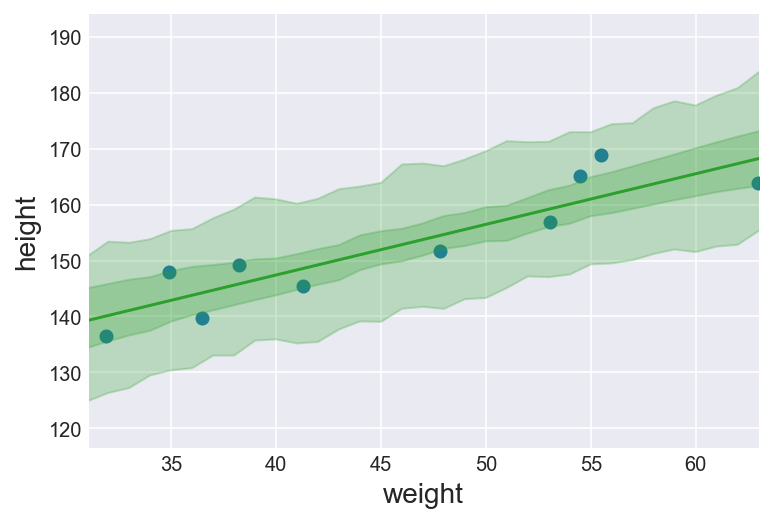

In [66]:
plt.scatter(d2.weight[:N], d2.height[:N])
plt.plot(weight_seq, mu_mean, 'C2')
plt.fill_between(weight_seq, mu_hpd[:,0], mu_hpd[:,1], color='C2', alpha=0.25)
plt.fill_between(weight_seq, post_samples_hpd[:,0], post_samples_hpd[:,1], color='C2', alpha=0.25)
plt.xlabel('weight', fontsize=14)
plt.ylabel('height', fontsize=14)
plt.xlim(d2.weight.min(), d2.weight.max());

#### Code 4.64

We have already loaded this dataset, check code 4.7 and 4.8.

In [67]:
d.head()

height     weight   age  male
0  151.765  47.825606  63.0     1
1  139.700  36.485807  63.0     0
2  136.525  31.864838  65.0     0
3  156.845  53.041915  41.0     1
4  145.415  41.276872  51.0     0

#### Code 4.65

In [68]:
d["weight_std"] = (d.weight - d.weight.mean()) / d.weight.std()
d["weight_std2"] = d.weight_std**2

#### Code 4.66

In [69]:
with pm.Model() as m_4_5:
    alpha = pm.Normal('alpha', mu=178, sd=100)
    beta = pm.Normal('beta', mu=0, sd=10, shape=2)
    sigma = pm.Uniform('sigma', lower=0, upper=50)
    mu = pm.Deterministic('mu', alpha + beta[0] * d.weight_std + beta[1] * d.weight_std2)
    height = pm.Normal('height', mu=mu, sd=sigma, observed=d.height)
    trace_4_5 = pm.sample(1000, tune=1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sigma, beta, alpha]
Sampling 2 chains: 100%|██████████| 4000/4000 [00:07<00:00, 545.78draws/s]


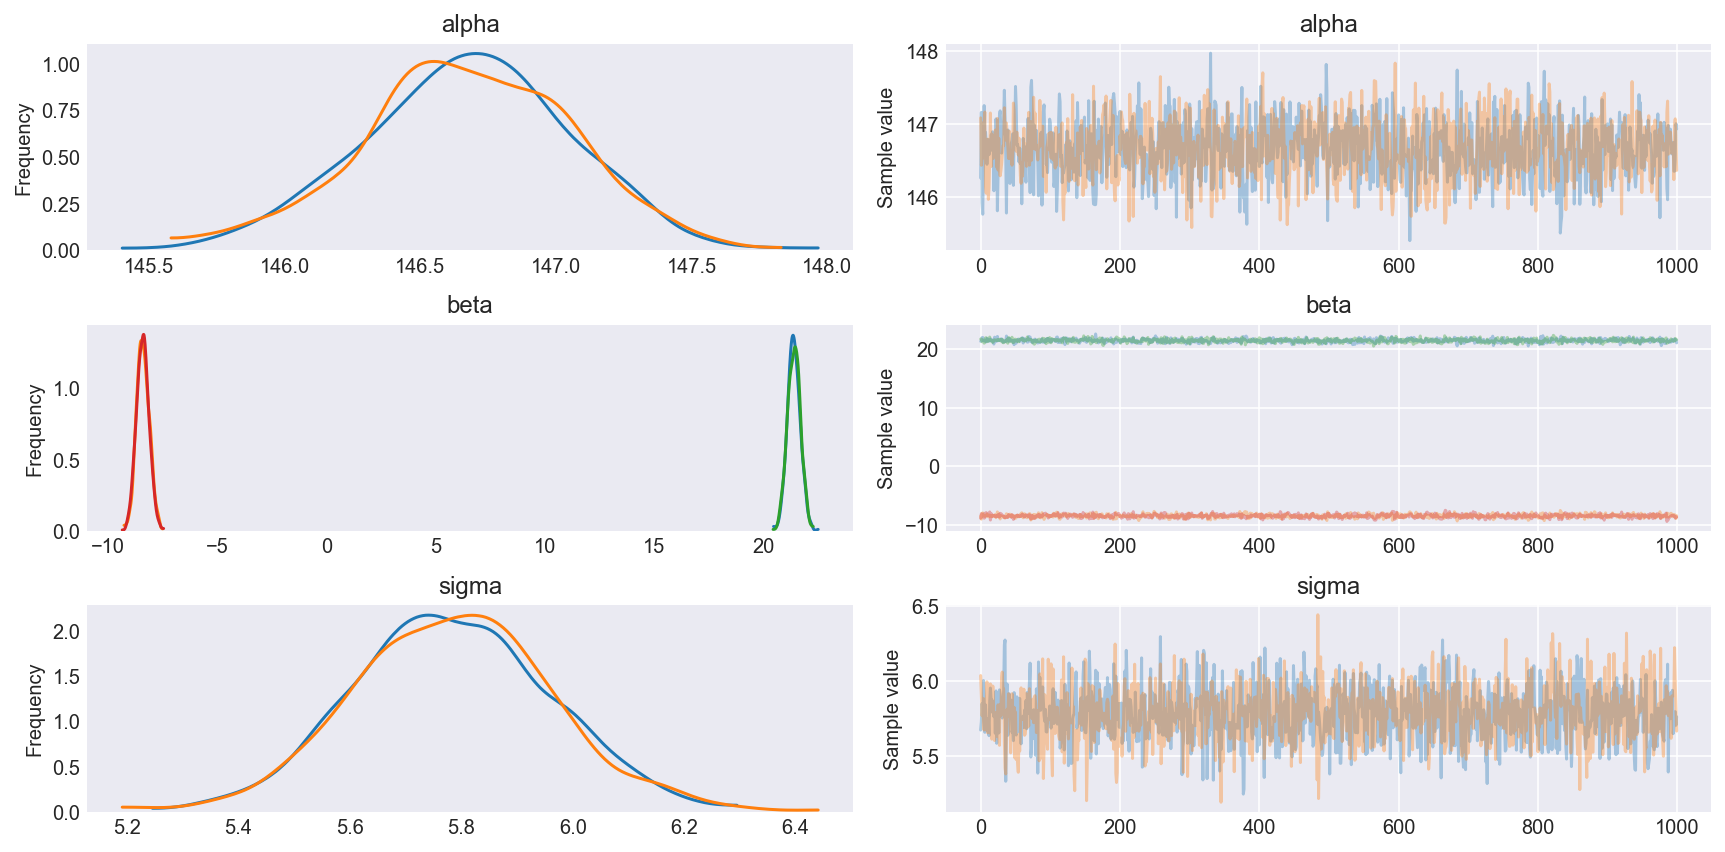

In [70]:
varnames = ['alpha', 'beta', 'sigma']
pm.traceplot(trace_4_5, varnames);

#### Code 4.67

In [71]:
pm.summary(trace_4_5, varnames, alpha=.11).round(2)

mean    sd  mc_error  hpd_5.5  hpd_94.5    n_eff  Rhat
alpha    146.67  0.38      0.01   146.05    147.26  1384.53   1.0
beta__0   21.39  0.29      0.01    20.96     21.90  1547.55   1.0
beta__1   -8.41  0.28      0.01    -8.88     -7.98  1338.42   1.0
sigma      5.78  0.18      0.00     5.48      6.03  1718.85   1.0

#### Code 4.68

In [72]:
mu_pred = trace_4_5['mu']
idx = np.argsort(d.weight_std)
mu_hpd = pm.hpd(mu_pred, alpha=.11)[idx]

height_pred = pm.sample_ppc(trace_4_5, 200, m_4_5)
height_pred_hpd = pm.hpd(height_pred['height'], alpha=.11)[idx]

100%|██████████| 200/200 [00:00<00:00, 345.63it/s]


#### Code 4.69

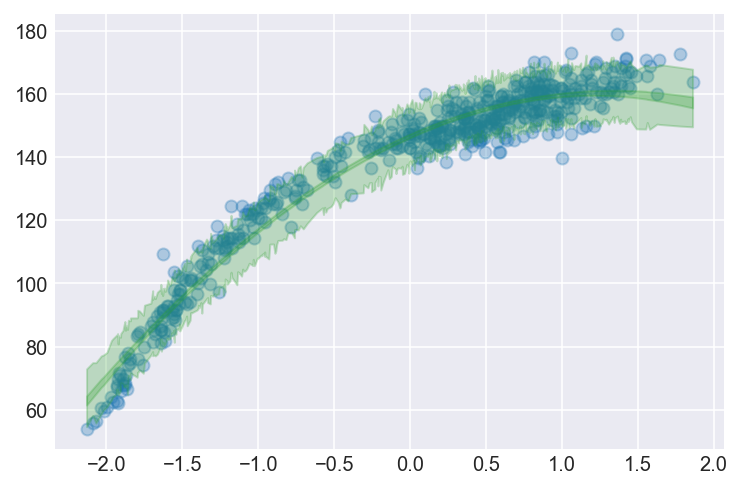

In [73]:
plt.scatter(d.weight_std, d.height, c='C0', alpha=0.3)
plt.fill_between(d.weight_std[idx], mu_hpd[:,0], mu_hpd[:,1], color='C2', alpha=0.25);
plt.fill_between(d.weight_std[idx], height_pred_hpd[:,0], height_pred_hpd[:,1], color='C2', alpha=0.25);

#### Code 4.70

We will stack the weights to get a 2D array, these simplifies wrriting a model. Now we can compute the dot product between beta and the 2D-array

In [74]:
weight_m = np.vstack((d.weight_std, d.weight_std**2, d.weight_std**3))

In [75]:
with pm.Model() as m_4_6:
    alpha = pm.Normal('alpha', mu=178, sd=100)
    beta = pm.Normal('beta', mu=0, sd=10, shape=3)
    sigma = pm.Uniform('sigma', lower=0, upper=50)
    mu = pm.Deterministic('mu', alpha + pm.math.dot(beta, weight_m))
    height = pm.Normal('height', mu=mu, sd=sigma, observed=d.height)
    trace_4_6 = pm.sample(1000, tune=1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sigma, beta, alpha]
Sampling 2 chains: 100%|██████████| 4000/4000 [00:08<00:00, 444.61draws/s]


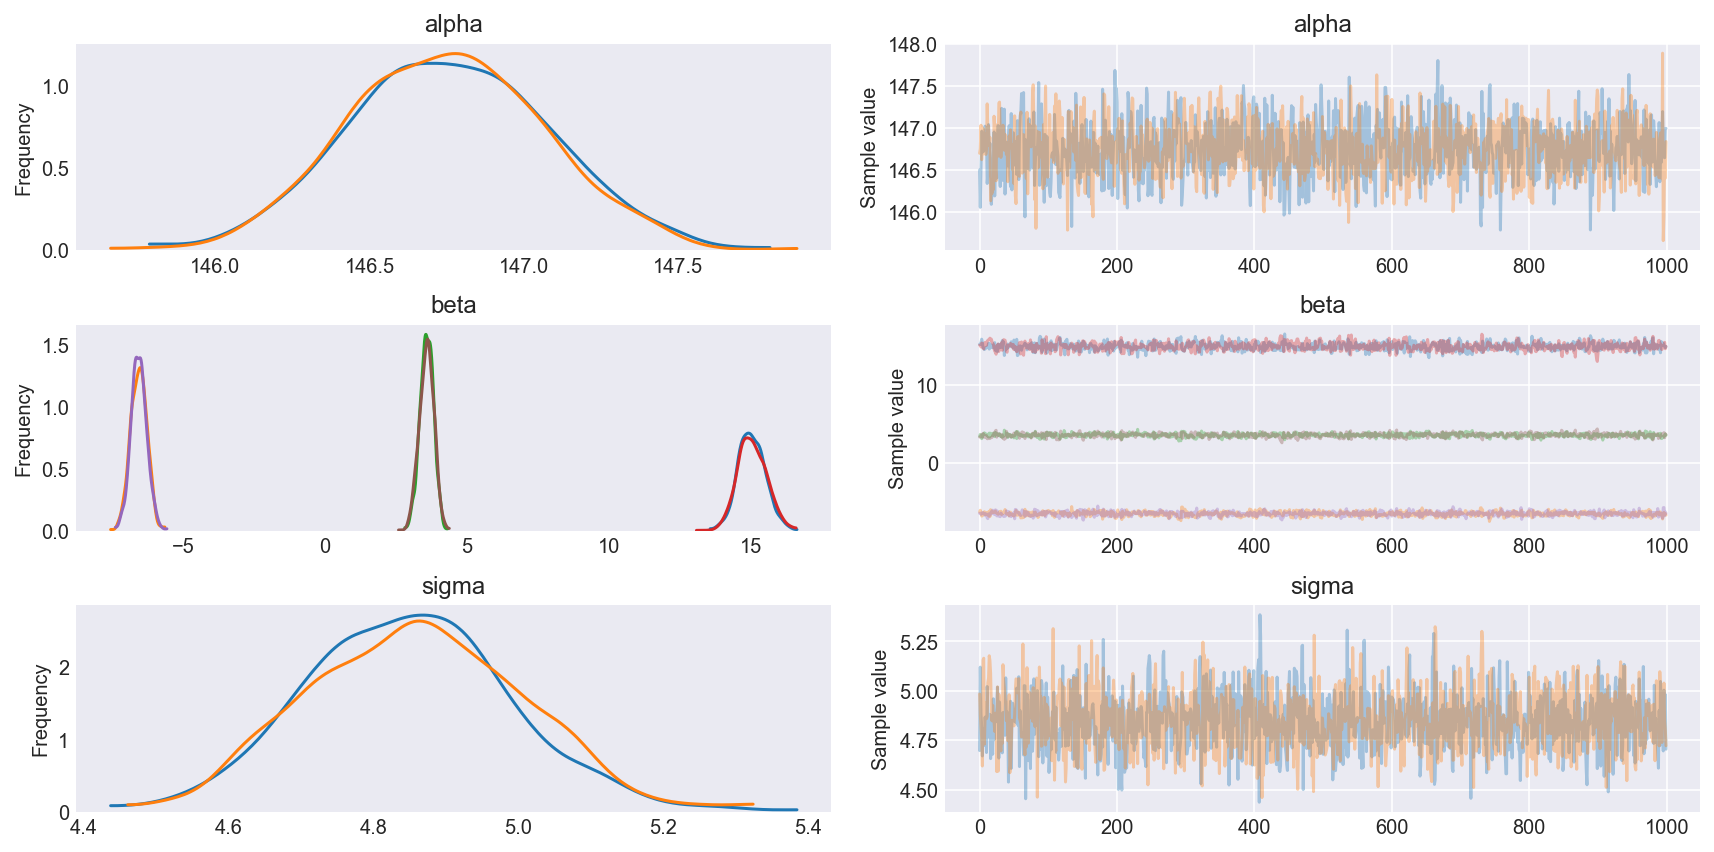

In [76]:
pm.traceplot(trace_4_6, varnames);

#### Code 4.71 and 4.72

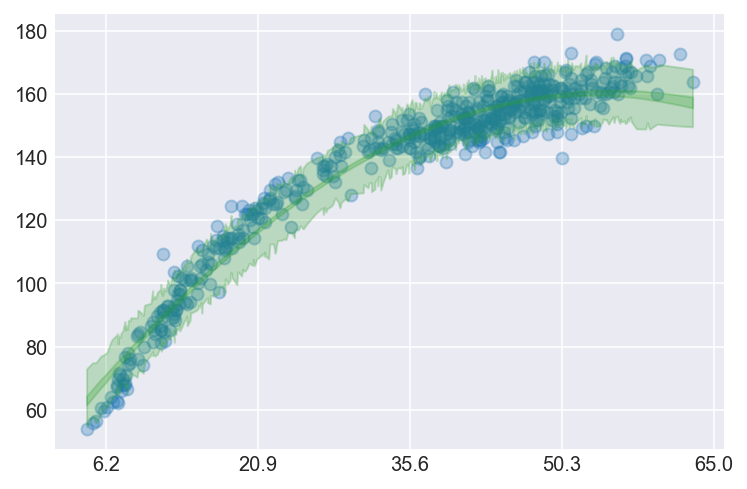

In [77]:
plt.scatter(d.weight_std, d.height, c='C0', alpha=0.3)
plt.fill_between(d.weight_std[idx], mu_hpd[:,0], mu_hpd[:,1], color='C2', alpha=0.25);
plt.fill_between(d.weight_std[idx], height_pred_hpd[:,0], height_pred_hpd[:,1], color='C2', alpha=0.25)

at = np.arange(-2, 3)
plt.xticks(at, np.round(at * d.weight.std() + d.weight.mean(), 1));

In [78]:
import sys, IPython, scipy, matplotlib, platform
print("This notebook was createad on a computer %s running %s and using:\nPython %s\nIPython %s\nPyMC3 %s\nNumPy %s\nPandas %s\nSciPy %s\nMatplotlib %s\n" % (platform.machine(), ' '.join(platform.linux_distribution()[:2]), sys.version[:5], IPython.__version__, pm.__version__, np.__version__, pd.__version__, scipy.__version__, matplotlib.__version__))

This notebook was createad on a computer x86_64 running   and using:
Python 3.6.4
IPython 6.2.1
PyMC3 3.5
NumPy 1.14.0
Pandas 0.22.0
SciPy 1.0.0
Matplotlib 2.1.2



# Practice
## Easy

**4E1** In the model definition below, which line is the likelihood?

$$y_i \sim \mathcal{N}(\mu, \sigma)$$
$$\mu \sim \mathcal{N}(0, 10)$$
$$\sigma \sim U(0, 10)$$

> $y_i \sim \mathcal{N}(\mu, \sigma)$ is the likelihood

**4E2** In the model definition above, how many parameters are in the posterior distribution?

> 2 — $\mu$ and $\sigma$

**4E3** Using the model definition above, write down the appropriate form of Bayes' theorem that includes the proper likelihood and priors.

$$P(\mu, \sigma \mid y_i) = \frac{\prod_i \mathcal{N}(y_i \mid \mu, \sigma)\mathcal{N}(\mu \mid 0, 10)U(\sigma \mid 0, 10)}{\int\int\prod_i \mathcal{N}(y_i \mid \mu, \sigma)\mathcal{N}(\mu \mid 0, 10)U(\sigma \mid 0, 10)d\mu d\sigma}$$

**4E4** In the model definition below, which line is the linear model?

$$y_i \sim \mathcal{N}(\mu, \sigma)$$
$$\mu_i = \alpha + \beta x_i$$
$$\alpha \sim \mathcal{N}(0, 10)$$
$$\beta \sim \mathcal{N}(0, 1)$$
$$\sigma \sim U(0, 10)$$

> $\sigma_i = \alpha + \beta x_i$ is the linear model

**4E5** In the model definition just above, how many parameters are in the posterior distribution?

> Three parameters in the posterior distribution. 2 parameters for the linear model $\mu_i$ and 1 for standard deviation $\sigma$.

## Medium
**4M1** For the model definition below, simulate observed heights from the prior (not the posterior)

$$y_i \sim \mathcal{N}(\mu, \sigma)$$
$$\mu \sim \mathcal{N}(0, 10)$$
$$\sigma \sim U(0, 10)$$

In [79]:
import scipy.stats as st
import seaborn as sns

Since heights *are* the posterior, we can simulate observed heights from the prior by simulating values for $\mu$ and $\sigma$ and then using those as priors for another sampling of random variates to produce our model of the posterior. 

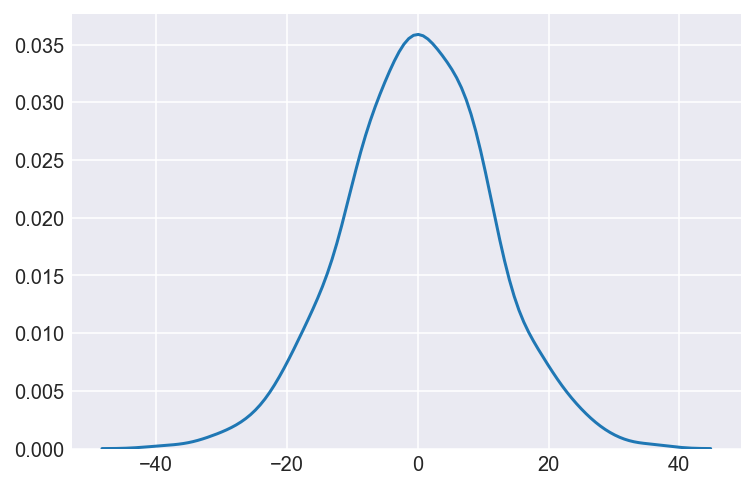

In [80]:
mu = st.norm.rvs(loc=0, scale=10, size=1000)
sigma = st.uniform.rvs(loc=0, scale=10, size=1000)
prior = st.norm.rvs(loc=mu, scale=sigma)
sns.kdeplot(prior);

**4M2** Translate the model above into a MAP formula

> No! we're using Python here. The posterior below should have an `observed=<dataset_variable>` kwarg in the call to `pm.Normal`, but this is an example and an observed set wasn't provided.

In [81]:
with pm.Model() as model:
    mu = pm.Normal('mu', 0, 10)
    sigma = pm.Uniform('sigma', 0, 10)
    posterior = pm.Normal('post', mu, sigma)

**4M3** Translate the `map` model formula below into a mathematical model definition. 
```R
flist <- alist(
    y ~ dnorm( mu, sigma ),
    mu <- a + b*x,
    a ~ dnorm(0, 50), 
    b ~ dunif(0, 10),
    sigma ~ dunif(0, 50)
    )
```
> The mathematical definition of above is:

$$ y_i \sim \mathcal{N}(\mu, \sigma $$
$$ \mu_i = \alpha + \beta x_i $$
$$ \alpha \sim \mathcal{N}(0, 50) $$
$$ \beta \sim U(0, 10) $$
$$ \sigma \sim U(0, 50) $$

**4M4** A sample of students is measured for height each year for 3 years. After the third year, you want to fit a linear regression predicting height using year as a predictor. Write down the mathematical model definition for this regression, using any variable names and priors you choose. Be prepared to defend your choice of priors. 

$$ h_i \sim \mathcal{N}(\mu_i, \sigma) $$
$$ \mu_i = \alpha + \beta y_i $$
$$ \alpha \sim \mathcal{N}(5, 0.5) $$ 
$$ \beta \sim \mathcal{N}(0, 10) $$
$$ \sigma \sim \mathcal{N}(0, 5) $$

> $h_i$ is the height we're modeling, and $y_i$ is the year predictor. Measurement is in feet because the American school system is trash and I don't use the proper units. $\alpha$'s $\sigma$ at 0.5 seems appropriate to capture 99.7% within 3.5 and 6.5 feet. We could relax this to 1 or something to have a more uninformative prior.  Our $\beta$ states that for every unit of year, 99.7% of the variation in height is between $\pm30$. I left $\sigma$ relatively uninformative but not as ridiculous as something like $U(0, 50)$. 

**4M5** Now suppose I tell you that the average height in the first year was 120cm (aha you got me) and that every student got taller each year. Does this information lead you to change your choice of priors? How?

> Well for one I'd switch to centimeters. So $\alpha$ would be $\mathcal{N}(120, 30)$. I'd widen the range on $\sigma$ as well to compensate. The other change would be possibly adjusting $\beta$ to a positive value since the author states students are getting taller every year. We could even bound $\beta$ to only be positive using a different distribution like Uniform or HalfNormal etc. 

**4M6** Now suppose I tell you that the variance among heights for students of the same age is never more than 64cm. How does this lead to your revision of prior?

> I like using the 3 standard deviation rule to account of 99.7% of variation, and since $sd = \sqrt{var}$, I would set $\sigma = \mathcal{N}(0, \frac{\sqrt{64}}{3})$. 

## Hard

**4H1** The weights listed below were recorded in the !Kung census, but hiehgts were not recorded for these individuals. Provide predicted heights and 89% intervals (either HPDI or PI) for each of these individuals. That is, fill in the table below using model-based predictions.

Build DataFrame to fill in

In [82]:
h1 = pd.DataFrame()
h1['weight'] = [46.95, 43.72, 64.78, 32.59, 54.63] 

Train model

In [83]:
with pm.Model() as model:
    # Priors
    a = pm.Normal('a', 178, 100)
    b = pm.Normal('b', 0, 10)
    sd = pm.Uniform('sd', 0, 50)
    # Linear Model
    mu = a + b * d.weight
    # Posterior
    post = pm.Normal('post', mu=mu, sd=sd, observed=d.height)
    trace = pm.sample(1000, tuning=5000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sd, b, a]
Sampling 2 chains: 100%|██████████| 3000/3000 [00:05<00:00, 597.91draws/s]
The acceptance probability does not match the target. It is 0.8911830526771708, but should be close to 0.8. Try to increase the number of tuning steps.


Calculate expected height and HPDI using linear model coefficients to create a pool of expected heights for each weight value. 

In [84]:
exp_heights = []
interval_89 = []   
for weight in h1.weight:
    mu_at_x = trace['a'] + trace['b'] * weight
    exp_heights.append(round(np.median(mu_at_x), 2))
    interval_89.append([round(x, 2) for x in pm.hpd(mu_at_x)])
h1['exp_height'] = exp_heights
h1['89_interval'] = interval_89
h1

weight  exp_height       89_interval
0   46.95      158.25  [157.26, 159.25]
1   43.72      152.56  [151.68, 153.47]
2   64.78      189.66   [187.9, 191.37]
3   32.59      132.93   [132.21, 133.8]
4   54.63      171.78  [170.52, 173.09]

Example KDE for weight at 46.95

158.24670820203258

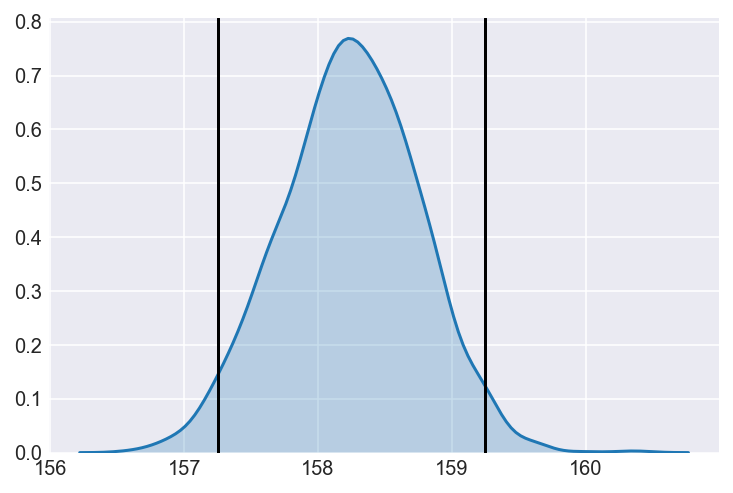

In [85]:
mu_at_46_95 = trace['a'] + trace['b'] * 46.95
sns.kdeplot(mu_at_46_95, shade=True)
[plt.axvline(x, c='k') for x in pm.hpd(mu_at_46_95)]
np.median(mu_at_46_95)

**4H2** Select out all the rows in the dataset with ages below 18 years of age. If you do it right you should end up with 192 rows in.

a) Fit a linear regression to these data using map. Present and interpret the estimates. For every 10 units of increase in weight, how much taller does the model predict a child gets?

b) Plot the raw data, with height on the veritcal axis and weight on the horizontal axis. Superimpose the MAP regression line and 89% HPDI for the mean. Superimpose the 89% HPDI for predicted heights. 

c) What aspects of the model fit concern you? Describe the kinds of assumptions you would change, if any, to improve the model. You dont' hae to write any new code. Just explin what the model appears to be doing a bad job of, and what you hypothesize would be a better model. 

**A**

Subset dataframe

In [142]:
df = d[d.age < 18]
print(df.shape)
df = df.sort_values('weight')  # Sorting for HPD calcluation plotting later
df.head()

(192, 6)


height    weight  age  male  weight_std  weight_std2
517  53.9750  4.252425  0.0     0   -2.130431     4.538736
466  55.8800  4.847764  0.0     0   -2.089984     4.368035
519  56.5150  5.159609  0.0     0   -2.068798     4.279926
354  60.4520  5.669900  1.0     1   -2.034130     4.137684
325  59.6138  5.896696  1.0     0   -2.018722     4.075237

Plot relationship

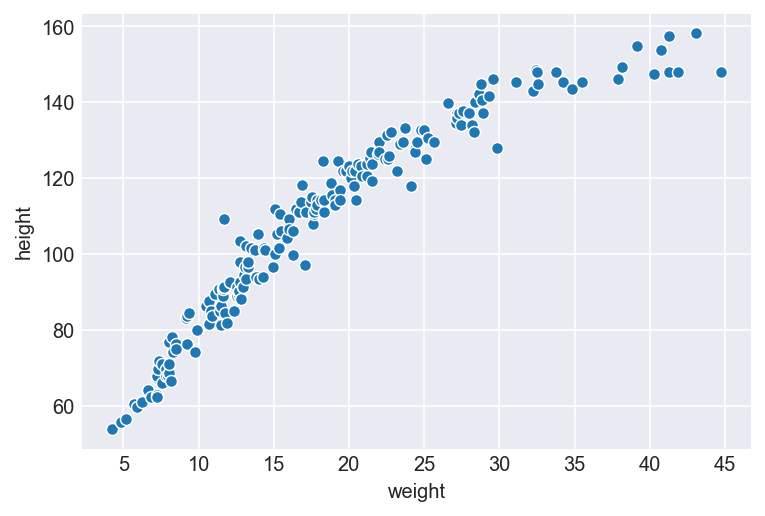

In [143]:
sns.scatterplot(df.weight, df.height);

Define linear model for data

$$ h_i \sim \mathcal{N}(\mu_i, \sigma) $$
$$ \mu_i = \alpha + \beta w_i $$
$$ \alpha \sim \mathcal{N}(60, 10) $$
$$ \beta \sim \mathcal{N}(0, 10) $$
$$ \sigma \sim U(0, 10) $$

In [144]:
with pm.Model() as model:
    # Priors
    sd = pm.Uniform('sd', 0, 10)
    a = pm.Normal('a', 60, 10)
    b = pm.Normal('b', 0, 10)
    # Define linear model
    mu = a + b * df.weight
    # Define posterior
    post = pm.Normal('post', mu=mu, sd=sd, observed=df.height)
    trace = pm.sample(1000, tuning=2000)
    trace_df = pm.trace_to_dataframe(trace)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [b, a, sd]
Sampling 2 chains: 100%|██████████| 3000/3000 [00:05<00:00, 507.84draws/s]


Plot MAP (median of sampled posterior values) over data

a     58.319878
b      2.716859
sd     8.502845
dtype: float64


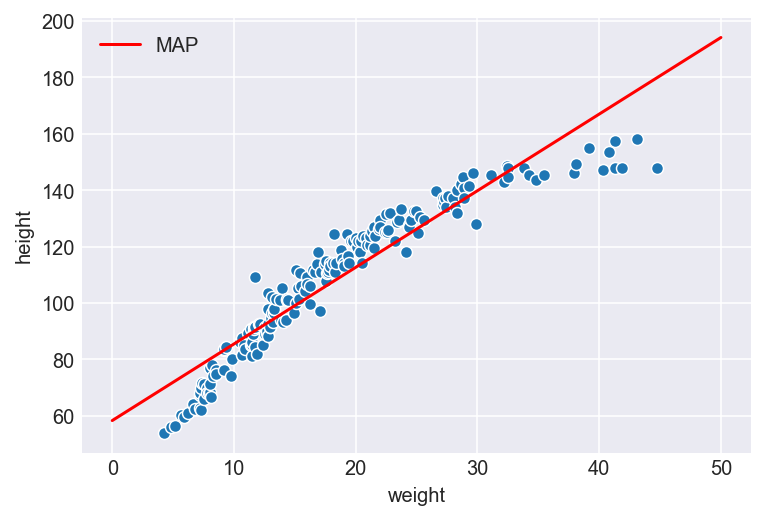

In [215]:
weight_seq = np.linspace(0, 50)
fit = trace_df.median()
exp_height = fit.a + fit.b * weight_seq

sns.scatterplot(df.weight, df.height)
sns.lineplot(weight_seq, exp_height, label='MAP', color='r');
print(fit)

For every 10 units of weight increase, the kid is expected to be ~27.2 units taller.

**B** 

HPD of mean

In [216]:
mu_pred = np.zeros((len(weight_seq), len(trace)*trace.nchains))
for i, w in enumerate(weight_seq):
    mu_pred[i] = trace.a + trace.b * w

In [217]:
mu_hpd = pm.hpd(mu_pred.T, alpha=.11)

Plot data, MAP, and HPD of mean

a     58.319878
b      2.716859
sd     8.502845
dtype: float64


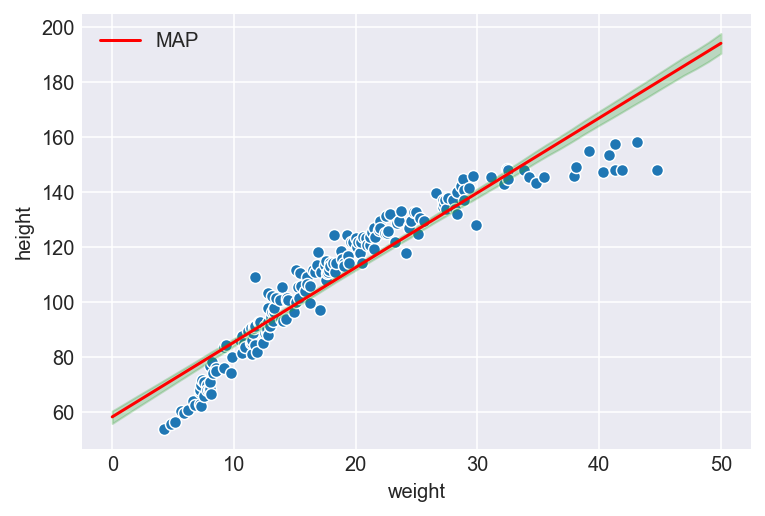

In [218]:
sns.scatterplot(df.weight, df.height)
plt.fill_between(weight_seq, mu_hpd[:,0], mu_hpd[:,1], color='C2', alpha=0.25)
sns.lineplot(weight_seq, exp_height, label='MAP', color='r');
print(fit)

Superimpose the 89% HPDI for predicted heights. 

In [219]:
height_pred = pm.sample_ppc(trace, 200, model)
height_pred_hpd = pm.hpd(height_pred['post'], alpha=0.11)

100%|██████████| 200/200 [00:00<00:00, 880.46it/s]


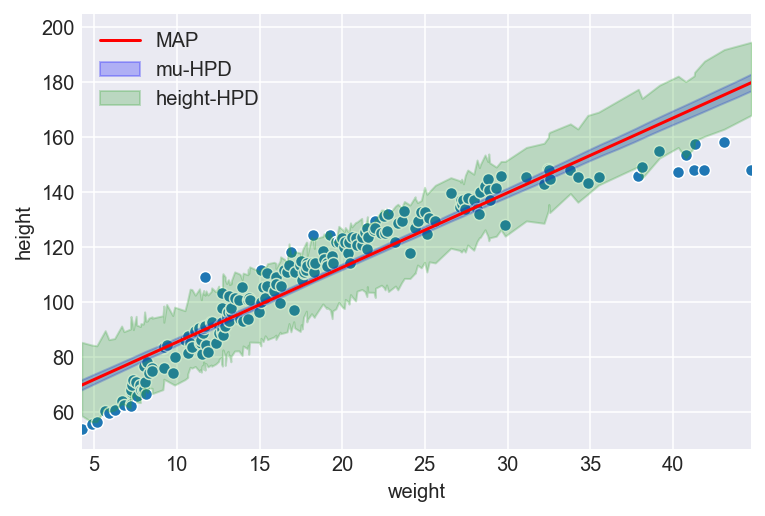

In [226]:
sns.scatterplot(df.weight, df.height)
plt.fill_between(weight_seq, mu_hpd[:,0], mu_hpd[:,1], color='blue', alpha=0.25, label='mu-HPD')
plt.fill_between(df.weight, height_pred_hpd[:,0], height_pred_hpd[:, 1], color='C2', alpha=0.25, label='height-HPD')
sns.lineplot(weight_seq, exp_height, label='MAP', color='r');
plt.xlim(df.weight.min(), df.weight.max());

**C**

The fit line, while possessing a small mean HPD interval, doesn't really follow the path of the data which appears to be non-linear. A polynomial model or data transform would probably be a better fit.

**4H3** Log-transform the above data

a) Model the relationship between height and the natural logarithm of weight (log-kg). Use the entire dataframe. Use the following model:

$$ h_i \sim \mathcal{N}(\mu_i, \sigma) $$
$$ \mu_i = \alpha + \beta \log(w_i) $$
$$ \alpha \sim \mathcal{N}(178, 100) $$
$$ \beta \sim \mathcal{N}(0, 100) $$
$$ \sigma \sim U(0, 50) $$

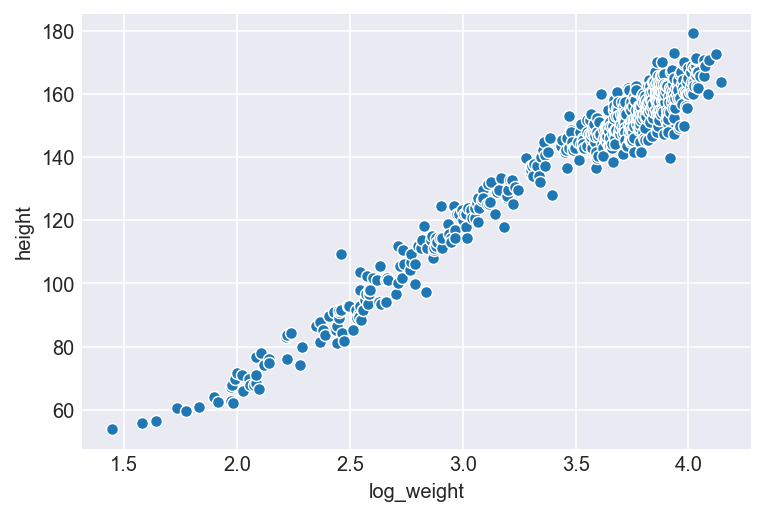

In [246]:
d = d.sort_values('weight')
d['log_weight'] = np.log(d.weight)
sns.scatterplot(d.log_weight, d.height);

Model data

In [234]:
with pm.Model() as model:
    sd = pm.Uniform('sd', 0, 50)
    alpha = pm.Normal('alpha', 178, 100)
    beta = pm.Normal('beta', 0, 100)
    
    mu = alpha + beta * d.log_weight
    
    post = pm.Normal('post', mu=mu, sd=sd, observed=d.height)
    trace = pm.sample(1000)
    t_df = pm.trace_to_dataframe(trace)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [beta, alpha, sd]
Sampling 2 chains: 100%|██████████| 3000/3000 [00:07<00:00, 376.26draws/s]
The acceptance probability does not match the target. It is 0.8919717480620354, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.882910243228691, but should be close to 0.8. Try to increase the number of tuning steps.


In [235]:
pm.summary(trace)

mean        sd  mc_error    hpd_2.5   hpd_97.5       n_eff  \
alpha -23.795145  1.399500  0.051392 -26.379089 -21.064531  599.986094   
beta   47.077943  0.398406  0.014772  46.270366  47.803716  605.411406   
sd      5.156383  0.158842  0.004787   4.852468   5.457934  965.697436   

           Rhat  
alpha  0.999907  
beta   0.999820  
sd     1.001027

For every unit of log weight, the height changes by 47 units.

In [312]:
np.exp(1), np.exp(2), np.exp(3), np.exp(4)

(2.718281828459045, 7.38905609893065, 20.085536923187668, 54.598150033144236)

**B**

Plot MAP line

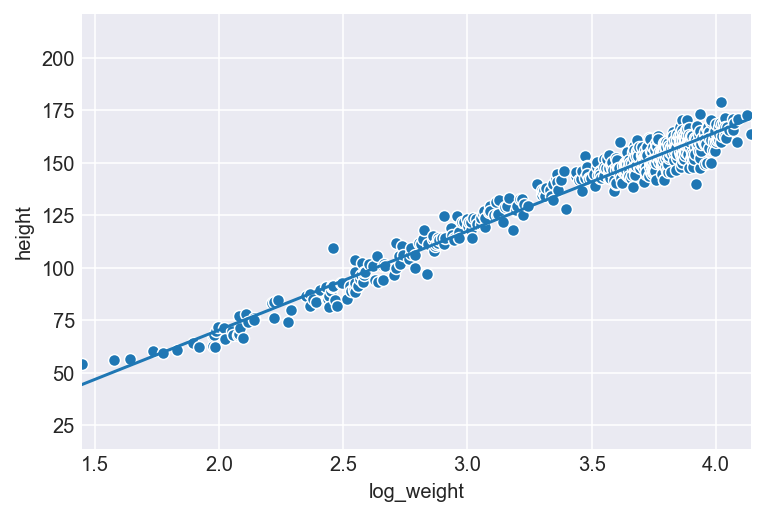

In [296]:
weight_seq = np.linspace(1, 5, 50)
t_map = t_df.median()
sns.scatterplot(d.log_weight, d.height)
sns.lineplot(weight_seq, t_map.alpha + t_map.beta * weight_seq)
plt.xlim(d.log_weight.min(), d.log_weight.max());

Calculate HPD of mean

In [297]:
mu_pred = pd.DataFrame(columns=range(len(weight_seq)))
for i, w in enumerate(weight_seq):
    mu_pred.loc[i] = t_df.alpha + t_df.beta * w

In [298]:
mu_hpd = pm.hpd(np.array(mu_pred).T, alpha=0.3)

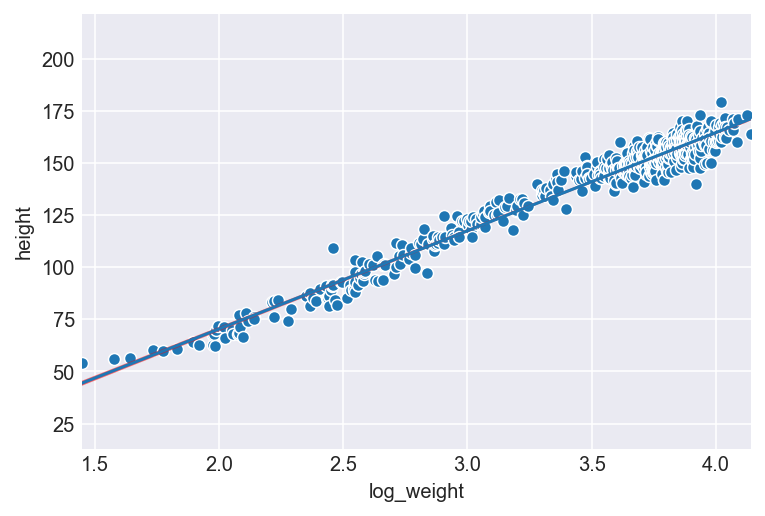

In [303]:
sns.scatterplot(d.log_weight, d.height)
sns.lineplot(weight_seq, t_map.alpha + t_map.beta * weight_seq)
plt.fill_between(weight_seq, mu_hpd[:,0], mu_hpd[:, 1], color='red', alpha=.55)
plt.xlim(d.log_weight.min(), d.log_weight.max());

`sample_ppc` returns a sample where each column value is the variable input (in this case the weight). This matrix is 200x544.

In [301]:
post_samples = pm.sample_ppc(trace, 200, model)
post_samples_hpd = pm.hpd(post_samples['post'], alpha=0.03)

100%|██████████| 200/200 [00:00<00:00, 830.32it/s]


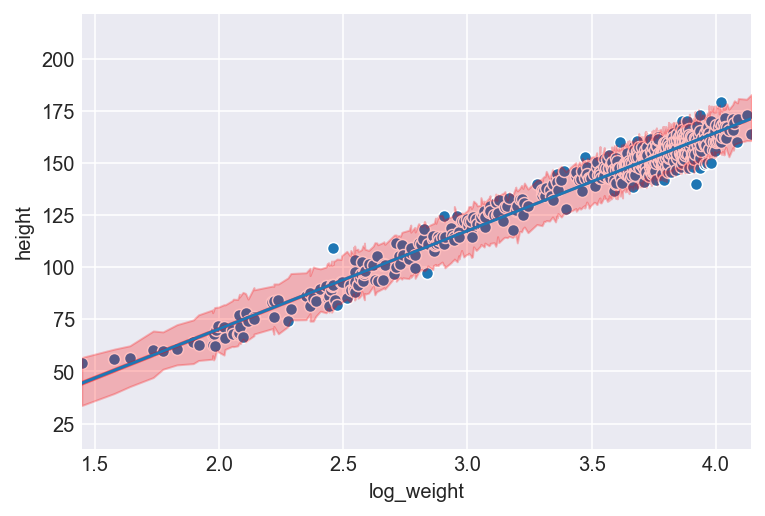

In [302]:
sns.scatterplot(d.log_weight, d.height)
sns.lineplot(weight_seq, t_map.alpha + t_map.beta * weight_seq)
plt.fill_between(weight_seq, mu_hpd[:,0], mu_hpd[:, 1], color='r', alpha=.5)
plt.fill_between(d.log_weight, post_samples_hpd[:,0], post_samples_hpd[:, 1], color='r', alpha=.25)
plt.xlim(d.log_weight.min(), d.log_weight.max());